# Project Introduction

This project develops a supervised machine learning solution for a binary classification task: predicting whether a credit card application should be approved or denied based on 15 anonymized application attributes (mixed numeric, categorical, binary). The learning approach is supervised learning, and the problem type is binary classification. I evaluate and compare multiple algorithms: linear models (Logistic Regression), tree ensembles (Random Forest, XGBoost), and kernel methods (SVM). The objective is to build a performant classifier that supports consistent, data-driven credit decisioning.

Key elements:
- Type of Learning: Supervised Machine Learning
- Task Type: Binary Classification (Credit Approval)
- Algorithms Utilized: Logistic Regression, Random Forest, XGBoost, Support Vector Machine



## Project Motivation & Goals

### Motivation
Credit approval is a high-stakes decision with direct impact on both financial institutions and individuals. The UCI Credit Approval dataset, although anonymized, provides a realistic environment to practice and learn the entire machine learning workflow: from handling raw, messy data to building interpretable models that inform decision-making. There are a lot of opportunities to deal with the data cleanings.


### Primary Goal
The goal of this project is not only to build predictive models for credit approval but also to learn the core skills of applied machine learning:

- Data Preprocessing – Practice dealing with missing values, encoding categorical data, and scaling continuous variables.

- Model Selection & Evaluation – Compare different classifiers, understand trade-offs between interpretability (e.g. logistic regression) and accuracy (e.g. ensemble models), and learn how to evaluate models beyond accuracy using precision, recall, and AUC-ROC curve.

- Feature Understanding – Learn to identify which features carry the most predictive power and how to interpret model outputs in a meaningful way.

- End-to-End Workflow – Develop experience in building a complete ML project pipeline: data exploration, preprocessing, training, tuning, evaluation, and communication of results.


## Data Source & Citation

### Dataset Origin
The dataset used in this project is the UCI Credit Approval dataset (also known historically as the Australian Credit Approval dataset). It contains 690 credit card applications with 15 anonymized predictor attributes (mixed categorical, binary, and continuous) and a binary target indicating approval (`+`) or denial (`-`). Attribute names and categorical value labels were intentionally obfuscated to protect confidentiality.

### How the Data Was Gathered
The original data were collected by a financial institution processing real credit applications. To enable research use while protecting privacy, identifying details and semantic meanings of variables were masked. The dataset has since been hosted in the UCI Machine Learning Repository for benchmarking classification.

### Key Characteristics
- Instances: 690
- Features: 15 anonymized applicant/application attributes
- Target: Binary approval outcome
- Has Missing Values: Yes

### Access URL
UCI Repository Landing Page: https://archive.ics.uci.edu/dataset/27/credit+approval

### License
This dataset is licensed under a Creative Commons Attribution 4.0 International (CC BY 4.0) license. This allows for the sharing and adaptation of the datasets for any purpose, provided that the appropriate credit is given.



[Github Repository: CSCA_5622_Supervised_Learning](https://github.com/ligenchang/CSCA_5622_Supervised_Learning)


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Read data
In the first glance, he data is without heder names. It contains mixed data types: categorical (str), numeric (float/int), and target variable (str).

The last column (15) is the label for supervised learning: whether credit was approved (+) or denied (-).

In [5]:
df = pd.read_csv('credit-approval/crx.data', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


## Add column names for clarity
The column_names list replaces the default integer column labels (0–15) with placeholder names A1–A15 for features and Target for the label.

All attribute names and values have been anonymized to protect confidentiality.

In [6]:
#All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data.

column_names = [
    'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 
    'A11', 'A12', 'A13', 'A14', 'A15', 'Target'
]

df = pd.read_csv(
    'credit-approval/crx.data',
    header=None,
    names=column_names,)
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Target
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


### Inspecting the Dataset

We first check the overall shape and structure of the dataset:

- Number of samples (rows): 690
- Number of features (columns): 15 after excluding the target column.  
- Data types: To understand which columns are numeric and which are categorical.  
- Target distribution: Counts of approved (`+`) and denied (`-`) applications.

#### Feature Type Breakdown
| Type | Count | Features |
|------|-------|----------|
| Continuous Numeric | 6 | A2, A3, A8, A11, A14, A15 |
| Categorical (non-binary) | 7 | A1, A4, A5, A6, A7, A13, (A9/A10/A12 are binary flags) |
| Binary Flags | 3 | A9, A10, A12 |
| Target | 1 | A16 |


In [7]:
print(f"Dataset shape: {df.shape}")
print(f"Samples: {df.shape[0]}")
print(f"Features: {df.shape[1] - 1}")
print(f"Data types:\n{df.dtypes}")
print(f"\nTarget value counts:")
display(df['Target'].value_counts())

Dataset shape: (690, 16)
Samples: 690
Features: 15
Data types:
A1         object
A2         object
A3        float64
A4         object
A5         object
A6         object
A7         object
A8        float64
A9         object
A10        object
A11         int64
A12        object
A13        object
A14        object
A15         int64
Target     object
dtype: object

Target value counts:


Target
-    383
+    307
Name: count, dtype: int64

### Summarizing Feature Types and Values

We want to inspect each column to understand:

- **Type**: The data type of the feature (numeric, object, etc.).  
- **Unique_Count**: How many distinct values the feature has.  
- **Sample_Values**: A preview of the first few unique values for quick inspection.  

This helps in **deciding preprocessing steps**, e.g., encoding categorical features, scaling numeric features, or handling outliers.


In [8]:
type_summary = []
for col in df.columns:
    dtype = df[col].dtype
    nunique = df[col].nunique()
    unique_vals = df[col].unique()[:20]  # Show first 10 unique values
    type_summary.append({
        'Feature': col,
        'Type': dtype,
        'Unique_Count': nunique,
        'Sample_Values': str(unique_vals)
    })

type_df = pd.DataFrame(type_summary)
type_df

,Feature,Type,Unique_Count,Sample_Values
0,A1,object,3,['b' 'a' '?']
1,A2,object,350,['30.83' '58.67' '24.50' '27.83' '20.17' '32.0...
2,A3,float64,215,[ 0. 4.46 0.5 1.54 5.625 4. 1....
3,A4,object,4,['u' 'y' '?' 'l']
4,A5,object,4,['g' 'p' '?' 'gg']
5,A6,object,15,['w' 'q' 'm' 'r' 'cc' 'k' 'c' 'd' 'x' 'i' 'e' ...
6,A7,object,10,['v' 'h' 'bb' 'ff' 'j' 'z' '?' 'o' 'dd' 'n']
7,A8,float64,132,[1.25 3.04 1.5 3.75 1.71 2.5 6.5 0.0...
8,A9,object,2,['t' 'f']
9,A10,object,2,['t' 'f']


### Checking for Missing Values

We need to identify if any columns have missing data:

- **Missing_Count**: Number of missing (null) entries per column.  
- **Missing_Percentage**: Percentage of missing values relative to the total number of rows.  

This helps us decide whether to **impute, drop, or leave missing values** before further analysis or modeling.


In [9]:
df = df.replace('?', np.nan)


In [10]:
missing_counts = df.isnull().sum()
missing_percentages = (missing_counts / len(df)) * 100

missing_summary = pd.DataFrame({
    'Missing_Count': missing_counts,
    'Missing_Percentage': missing_percentages.round(2)
})

missing_summary

,Missing_Count,Missing_Percentage
A1,12,1.74
A2,12,1.74
A3,0,0.00
A4,6,0.87
A5,6,0.87
A6,9,1.30
A7,9,1.30
A8,0,0.00
A9,0,0.00
A10,0,0.00


## Target distribution and imbalance
The target balance rate is 55.51/44.49 ≈ 1.247, hence dataset is fairly balanced, and standard classification models should handle it without special imbalance processing.

In [11]:
target_counts = df['Target'].value_counts()
target_percentages = (target_counts / len(df)) * 100

target_summary = pd.DataFrame({
    'Count': target_counts,
    'Percentage': target_percentages.round(2)
})
target_summary

,Count,Percentage
Target,,
-,383,55.51
+,307,44.49


### Convert continuous columns to numeric
Some continuous columns might be read as object type, so we convert them to numeric for analysis.

In [12]:
continuous_features = ['A2', 'A3', 'A8', 'A11', 'A14', 'A15']
for col in continuous_features:
    df[col] = pd.to_numeric(df[col])
print(f"Data types:\n{df.dtypes}")


Data types:
A1         object
A2        float64
A3        float64
A4         object
A5         object
A6         object
A7         object
A8        float64
A9         object
A10        object
A11         int64
A12        object
A13        object
A14       float64
A15         int64
Target     object
dtype: object


### Summary Statistics of Continuous Features
This provides a quick overview of the distribution and range of numeric features.

In [13]:

continuous_stats = df[continuous_features].describe()
display(continuous_stats.round(2))

,A2,A3,A8,A11,A14,A15
count,678.00,690.00,690.00,690.00,677.00,690.00
mean,31.57,4.76,2.22,2.40,184.01,1017.39
std,11.96,4.98,3.35,4.86,173.81,5210.10
min,13.75,0.00,0.00,0.00,0.00,0.00
25%,22.60,1.00,0.16,0.00,75.00,0.00
50%,28.46,2.75,1.00,0.00,160.00,5.00
75%,38.23,7.21,2.62,3.00,276.00,395.50
max,80.25,28.00,28.50,67.00,2000.00,100000.00


### Histograms of Continuous Features
These histograms show the distribution of each continuous variable.
Red dashed lines indicate the mean value for reference.


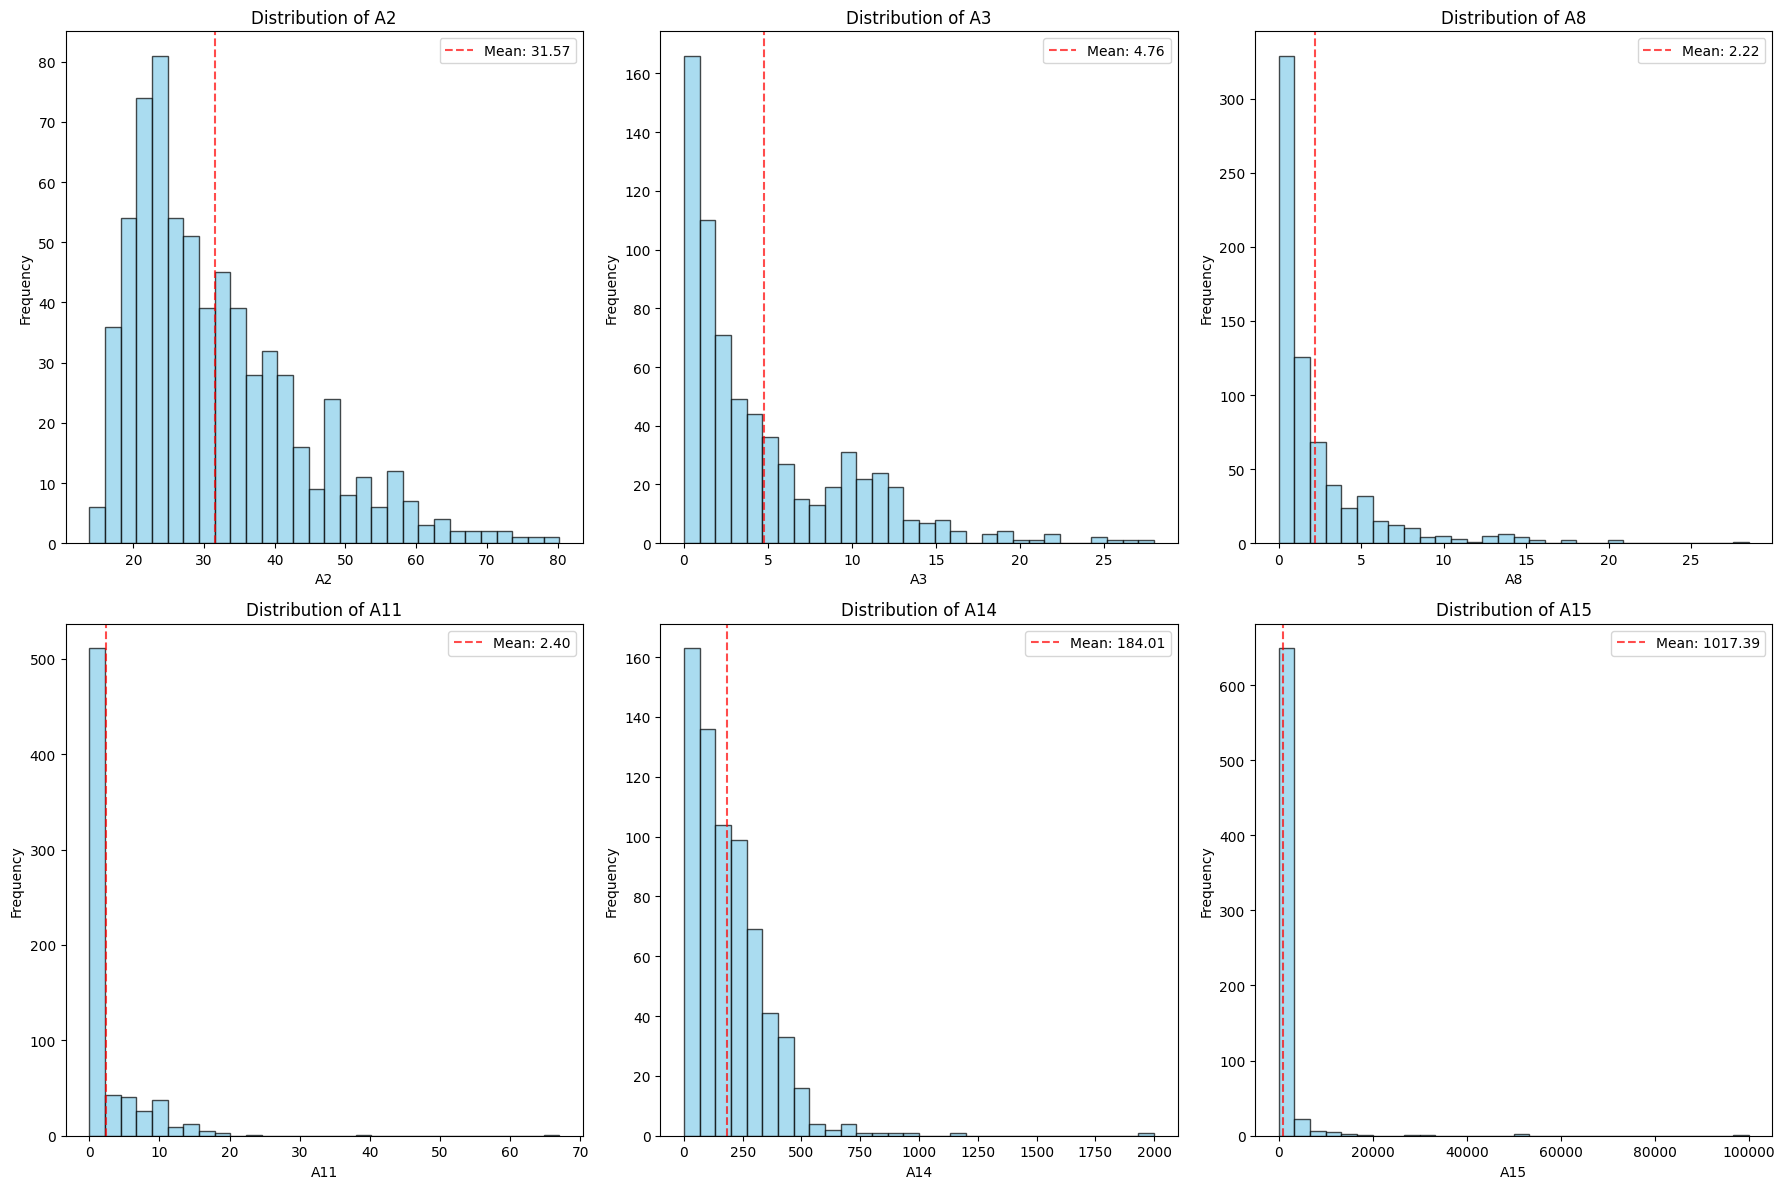

In [14]:
# Visualize the distribution of continuous features with histograms

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, feature in enumerate(continuous_features):
    
    # Plot histogram
    axes[i].hist(
        df[feature], 
        bins=30, 
        alpha=0.7, 
        color='skyblue', 
        edgecolor='black'
    )
    
    # Set titles and axis labels
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
    
    # Add a vertical line for the mean
    mean_val = df[feature].mean()
    axes[i].axvline(
        mean_val, 
        color='red', 
        linestyle='--', 
        alpha=0.7, 
        label=f'Mean: {mean_val:.2f}'
    )
    axes[i].legend()  # Show legend with mean value

plt.tight_layout()  # Adjust spacing between subplots
plt.show()


### Box Plots for Continuous Features
Box plots help detect outliers and visualize the spread of each numeric feature.
Points outside the whiskers are potential outliers.


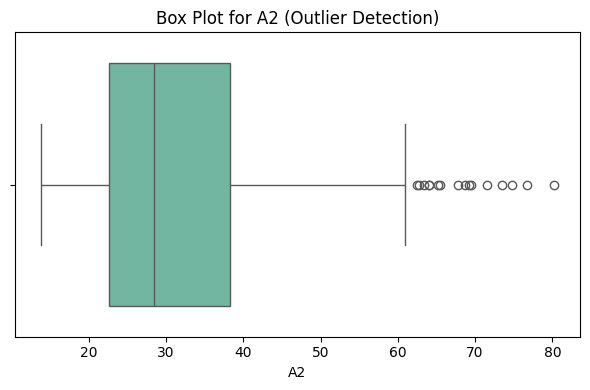

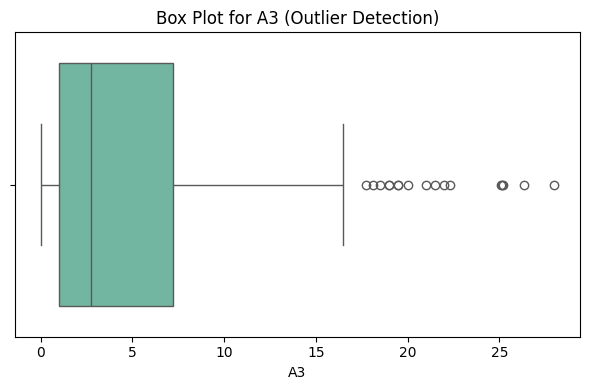

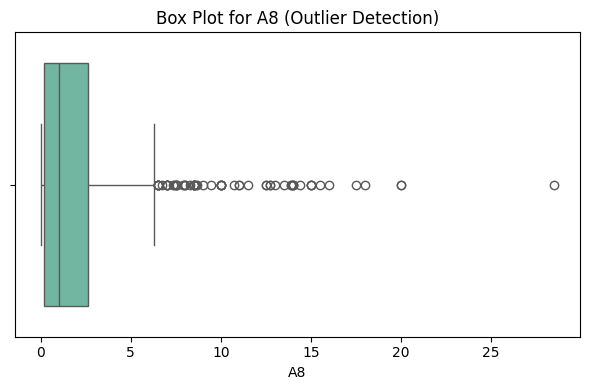

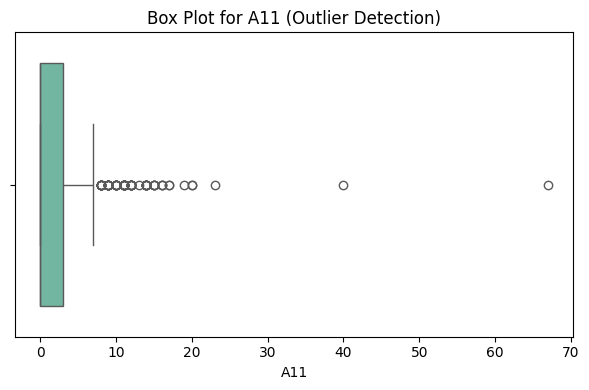

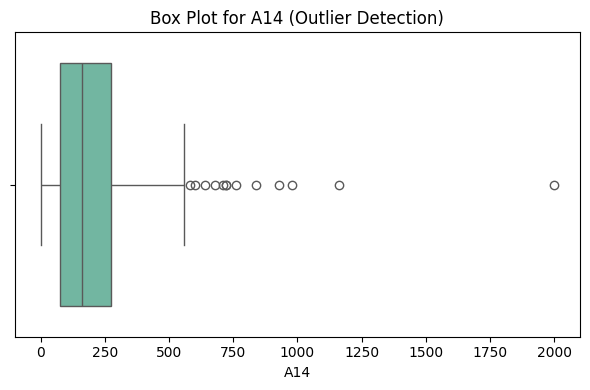

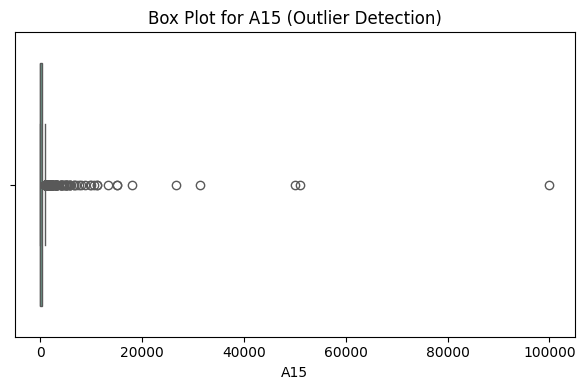

In [15]:
# Box plots for continuous features to identify outliers
import matplotlib.pyplot as plt
import seaborn as sns

for feature in continuous_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[feature], palette="Set2")
    plt.title(f'Box Plot for {feature} (Outlier Detection)')
    plt.xlabel(feature)
    plt.tight_layout()
    plt.show()


### Count Plots for Categorical Features
These bar charts show the frequency of each category, including binary features.
Values on top of bars indicate exact counts.


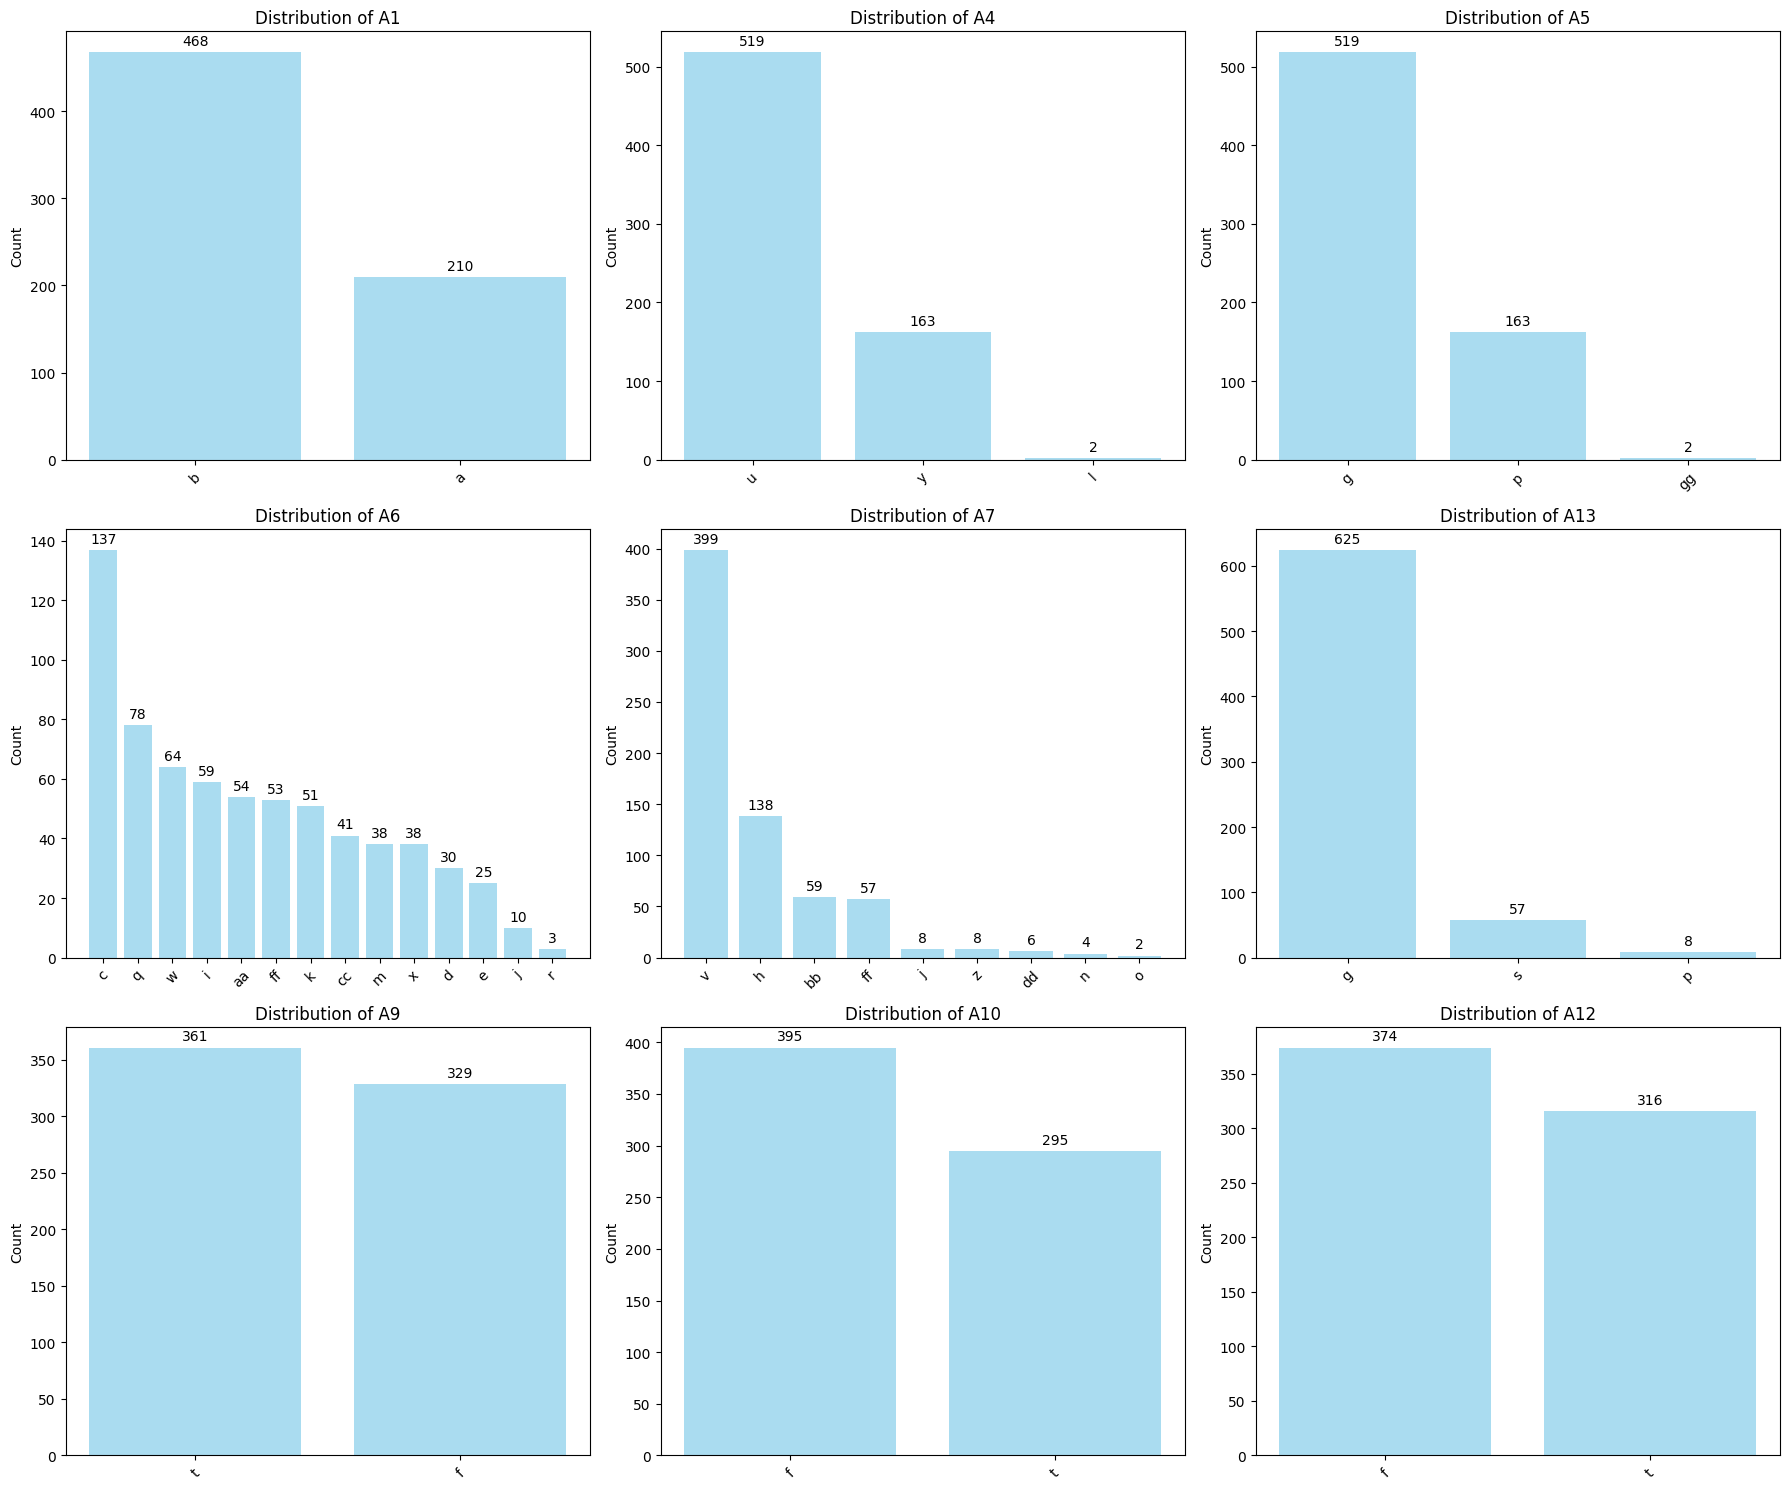

In [16]:

# Count plots for categorical features
binary_features = ['A9', 'A10', 'A12']
categorical_features = ['A1', 'A4', 'A5', 'A6', 'A7', 'A13']
all_categorical = categorical_features + binary_features

fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.ravel()

for i, feature in enumerate(all_categorical):
    if i < len(axes):
        value_counts = df[feature].value_counts()
        
        axes[i].bar(range(len(value_counts)), value_counts.values, 
                    color='skyblue', alpha=0.7)
        axes[i].set_xticks(range(len(value_counts)))
        axes[i].set_xticklabels(value_counts.index, rotation=45)
        axes[i].set_title(f'Distribution of {feature}')
        axes[i].set_ylabel('Count')
        
        # Add value labels on bars
        for j, v in enumerate(value_counts.values):
            axes[i].text(j, v + max(value_counts.values)*0.01, str(v), 
                        ha='center', va='bottom')

plt.tight_layout()
plt.show()



### Encode Target Variable as Numeric

This numeric encoding is useful for machine learning algorithms that require numeric inputs.

In [17]:
# Create numeric encoding for target (+ = 1, - = 0)
df['Target_numeric'] = df['Target'].map({'+': 1, '-': 0})

### Correlation Heatmap

This heatmap shows pairwise correlations between numeric features.  
- Values close to **1** or **-1** indicate strong positive or negative correlations, respectively.

From the heatmap, we can observe several key insights:

- **A11** has the highest correlation with `Target_numeric` (**0.41**), suggesting it is the most influential continuous feature for predicting the target.  
- **A2** and **A8** have a correlation of **0.40**, indicating they share some common information.  
- Based on the likely meaning of the anonymized columns, **A2** might represent **age** and **A8** might represent **income**, which explains why they are somewhat correlated.
- **A8** and **A11** have a correlation of **0.32**, showing moderate overlap between two of the strongest predictors. **A11** is likely **employment duration**, which also makes sense in relation to income (A8).


These insights can guide feature selection and interpretation for modeling.


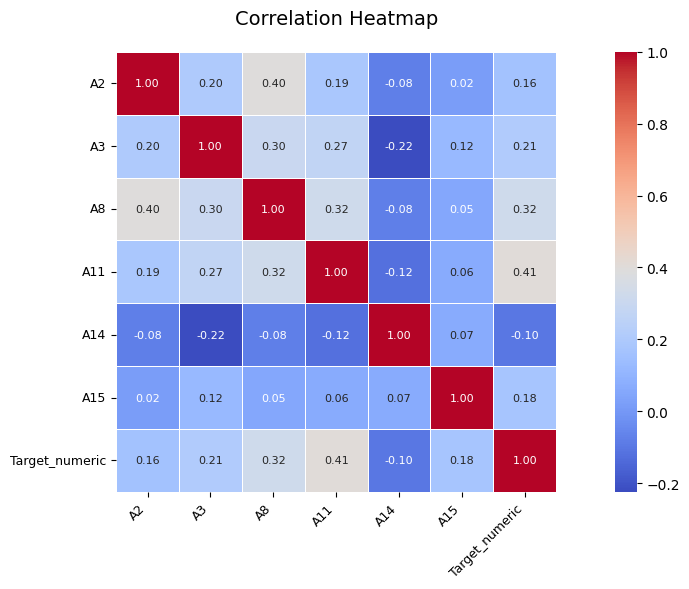

In [18]:
#Display the correlation matrix as heat map 
import matplotlib.pyplot as plt
import seaborn as sns

corr = df.select_dtypes(include=['int64', 'float64']).corr()

plt.figure(figsize=(12, 6))
sns.heatmap(
    corr, 
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True,
    annot_kws={"size":8},
    linewidths=0.5,
    square=True
)

plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(rotation=0, fontsize=9)
plt.title("Correlation Heatmap", fontsize=14, pad=20)
plt.tight_layout()
# plt.show()

plt.savefig("correlation_heatmap.png", dpi=300, bbox_inches='tight')

### Pairplot of Features
This plot shows relationships between features and their distributions.
- The diagonal shows the distribution of each feature using KDE.
- Off-diagonal plots show pairwise scatterplots.
- `hue='Target_numeric'` to color points by target class for better class separation visualization.


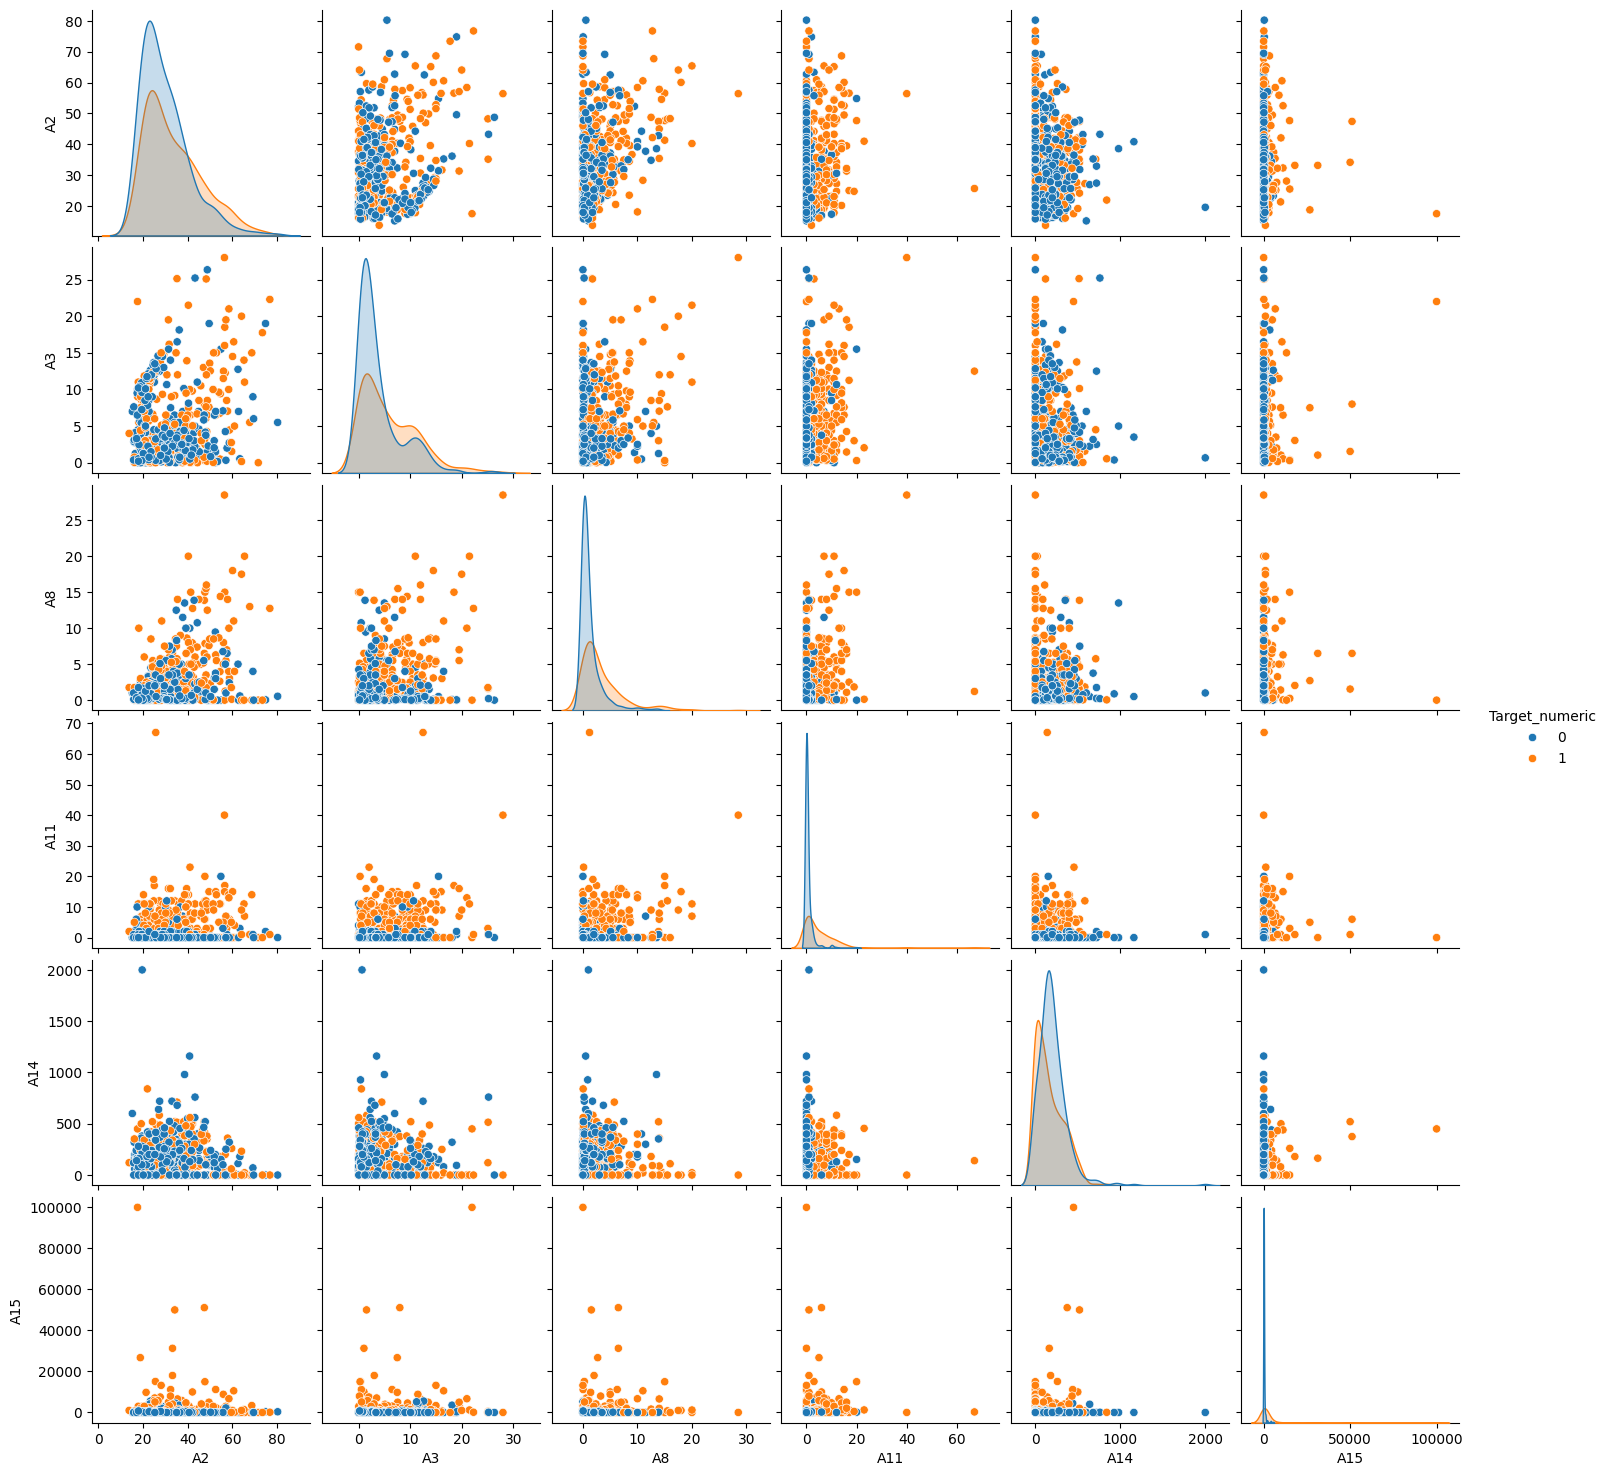

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

pair_grid = sns.pairplot(
    df.iloc[:, :50], 
    diag_kind="kde",
    hue='Target_numeric'
)

pair_grid.fig.savefig("pairplot.png", dpi=300, bbox_inches='tight')


### Key Findings from Exploratory Data Analysis

- **Missing Values:** Certain features contain missing data that may require imputation or removal.  
- **Mixed Data Types:** Features vary in type, necessitating appropriate preprocessing.  
- **Outliers:** Continuous features show outliers that might need to be addressed.  
- **Feature Scaling:** Differences in feature ranges suggest normalization may be necessary for distance-based algorithms.  
- **Multicollinearity:** Some features exhibit moderate correlation, but no strong multicollinearity is observed, hence no immediate action is required.


### Data Cleaning Plan

#### 1. Missing Value Treatment
- **Strategy:** Apply multiple approaches and compare results:
  - Remove rows with excessive missing values.
  - Impute missing categorical values using the most frequent category (mode).
  - Impute missing continuous values with median or mean.
  - Explore advanced imputation methods (e.g., KNN).

#### 2. Outlier Handling
- **Approach:** 
  - Investigate outliers to determine if they are errors or genuine extreme values.
  - Consider capping extreme values

#### 3. Feature Engineering
- **Encoding:** 
  - One-hot encode nominal categorical features.
  - Apply label encoding to ordinal features where a meaningful order exists.
  - Keep binary features as 0/1.
- **Scaling:** Standardize continuous features, especially for distance-based algorithms.


## Detailed Missing Value Analysis

- This analysis provides a summary of missing values for each feature, including:
  - **Missing Count:** Number of missing entries.
  - **Missing Percentage:** Proportion of missing entries relative to the dataset.
  - **Data Type:** Type of the feature (numeric, categorical, etc.).
  - **Unique Values:** Number of unique values in the feature.

In [20]:
## Detailed Missing Value Analysis

df_cleaning = df.copy()

missing_analysis = pd.DataFrame({
    'Feature': df_cleaning.columns,
    'Missing_Count': df_cleaning.isnull().sum(),
    'Missing_Percentage': (df_cleaning.isnull().sum() / len(df_cleaning)) * 100,
    'Data_Type': df_cleaning.dtypes,
    'Unique_Values': [df_cleaning[col].nunique() for col in df_cleaning.columns]
})

missing_analysis = missing_analysis.sort_values('Missing_Percentage', ascending=False)
print("Missing Value Summary")
display(missing_analysis)


Missing Value Summary


,Feature,Missing_Count,Missing_Percentage,Data_Type,Unique_Values
A14,A14,13,1.884058,float64,170
A1,A1,12,1.739130,object,2
A2,A2,12,1.739130,float64,349
A6,A6,9,1.304348,object,14
A7,A7,9,1.304348,object,9
A4,A4,6,0.869565,object,3
A5,A5,6,0.869565,object,3
A12,A12,0,0.000000,object,2
Target,Target,0,0.000000,object,2
A15,A15,0,0.000000,int64,240


### Missing Values by Feature Type
- This summary shows **missing values grouped by feature type**, which helps prioritize cleaning strategies.  
- Displaying missing values by type also makes it easier to identify feature groups with higher missing rates.


In [21]:
continuous_features = ['A2', 'A3', 'A8', 'A11', 'A14', 'A15']
binary_features = ['A9', 'A10', 'A12'] 
categorical_features = ['A1', 'A4', 'A5', 'A6', 'A7', 'A13']

print("Missing Values by Feature Type:")
for feature_type, features in [('Continuous', continuous_features), 
                              ('Binary', binary_features), 
                              ('Categorical', categorical_features)]:
    missing_in_type = df_cleaning[features].isnull().sum().sum()
    total_in_type = len(features) * len(df_cleaning)
    print(f"  {feature_type}: {missing_in_type}/{total_in_type} ({missing_in_type/total_in_type*100:.1f}%)")

Missing Values by Feature Type:
  Continuous: 25/4140 (0.6%)
  Binary: 0/2070 (0.0%)
  Categorical: 42/4140 (1.0%)


### Missing value impute for continuous features
- Imputing missing values in continuous features with the **median** preserves the central tendency of the data without being influenced by outliers.  
- Always verify the number of missing values before and after imputation to ensure all gaps are filled correctly.  

In [22]:
df_cleaned = df_cleaning.copy()
for feature in continuous_features:
    missing_before = df_cleaned[feature].isnull().sum()
    if missing_before > 0:
        median_value = df_cleaned[feature].median()
        df_cleaned[feature] = df_cleaned[feature].fillna(median_value)
        print(f"{feature}: {missing_before} missing values imputed with median ({median_value:.2f})")
    else:
        print(f"{feature}: No missing values")


A2: 12 missing values imputed with median (28.46)
A3: No missing values
A8: No missing values
A11: No missing values
A14: 13 missing values imputed with median (160.00)
A15: No missing values


### Missing value impute for categorical features

- Using the **mode** to impute categorical features fills missing values with the most common category, preserving the distribution of the data.  
- If a feature has no clear mode, a placeholder like `'unknown'` ensures no missing values remain.  
- This approach is simple and effective, but for features with high missing rates, consider **predictive imputation** or creating a separate "missing" category to retain potential signal.  
- Always check the feature's value distribution after imputation to ensure it still reflects the original data patterns.


In [23]:
for feature in categorical_features:
    missing_before = df_cleaned[feature].isnull().sum()
    if missing_before > 0:
        mode_value = df_cleaned[feature].mode().iloc[0]
        df_cleaned[feature] = df_cleaned[feature].fillna(mode_value)
        print(f"   {feature}: {missing_before} missing values imputed with mode '{mode_value}'")
    else:
        print(f"   {feature}: No missing values")

   A1: 12 missing values imputed with mode 'b'
   A4: 6 missing values imputed with mode 'u'
   A5: 6 missing values imputed with mode 'g'
   A6: 9 missing values imputed with mode 'c'
   A7: 9 missing values imputed with mode 'v'
   A13: No missing values


### Missing value impute for binary features

- Binary features typically have values 0/1 or True/False.  
- Imputing missing values with the **mode** preserves the most common category without altering the feature distribution significantly.  
- In this case, there is no missing value in binary features


In [24]:

for feature in binary_features:
    missing_before = df_cleaned[feature].isnull().sum()
    if missing_before > 0:
        mode_value = df_cleaned[feature].mode().iloc[0]
        df_cleaned[feature] = df_cleaned[feature].fillna(mode_value)        
        print(f"   {feature}: {missing_before} missing values imputed with mode '{mode_value}'")
    else:
        print(f"   {feature}: No missing values")

   A9: No missing values
   A10: No missing values
   A12: No missing values


The missing value imputing finished
- After imputing continuous, categorical, and binary features, this check confirms whether any missing values remain in the dataset.  


In [25]:
remaining_missing = df_cleaned.isnull().sum().sum()
print(f"Missing values after imputation: {remaining_missing}")

Missing values after imputation: 0


### Treat the outlier data

- Outliers in continuous features are capped at the **5th and 95th percentiles** to reduce their impact on modeling.  
- `clip()` replaces values below the lower bound with the 5th percentile and above the upper bound with the 95th percentile.  


In [26]:
df_outlier_treated = df_cleaned.copy()
for feature in continuous_features:
    data = df_outlier_treated[feature]
    
    lower_cap = data.quantile(0.05)
    upper_cap = data.quantile(0.95)
    
    lower_capped = (data < lower_cap).sum()
    upper_capped = (data > upper_cap).sum()
    total_capped = lower_capped + upper_capped
    
    if total_capped > 0:
        df_outlier_treated[feature] = data.clip(lower=lower_cap, upper=upper_cap)
        
        print(f"  {feature}: {total_capped} values capped ({total_capped/len(data)*100:.1f}%)")
        print(f"    Lower: {lower_capped} values capped at {lower_cap:.2f}")
        print(f"    Upper: {upper_capped} values capped at {upper_cap:.2f}")
    else:
        print(f"  {feature}: No values capped")

  A2: 70 values capped (10.1%)
    Lower: 35 values capped at 17.96
    Upper: 35 values capped at 56.23
  A3: 65 values capped (9.4%)
    Lower: 31 values capped at 0.17
    Upper: 34 values capped at 14.00
  A8: 35 values capped (5.1%)
    Lower: 0 values capped at 0.00
    Upper: 35 values capped at 8.57
  A11: 32 values capped (4.6%)
    Lower: 0 values capped at 0.00
    Upper: 32 values capped at 11.00
  A14: 33 values capped (4.8%)
    Lower: 0 values capped at 0.00
    Upper: 33 values capped at 460.00
  A15: 35 values capped (5.1%)
    Lower: 0 values capped at 0.00
    Upper: 35 values capped at 4119.40


## Binary Feature Encoding ('t' → 1, 'f' → 0)

- Binary features are explicitly encoded to numeric values for modeling:  
  - `'t'` is mapped to `1` (True / Yes)  
  - `'f'` is mapped to `0` (False / No)  
- This ensures **consistent encoding**, independent of the order of values in the dataset.  
- Converting binary features to numeric form allows machine learning algorithms to process them efficiently while preserving their original meaning.


In [27]:
# --- Encode binary features with 't' as 1 and 'f' as 0 ---
df_encoded = df_outlier_treated.copy()
binary_mapping = {}

for feature in binary_features:
    unique_values = df_encoded[feature].unique()
    print(f"   {feature}: Unique values = {unique_values}")
    
    if set(unique_values) <= {'t', 'f'}:
        # Explicitly map 't' to 1 and 'f' to 0
        mapping = {'f': 0, 't': 1}
        binary_mapping[feature] = mapping
        df_encoded[feature] = df_encoded[feature].map(mapping)
        print(f"   Mapping: {mapping}")
    else:
        print(f"   Warning: {feature} contains unexpected values {unique_values}")
    print()

df_encoded.head()


   A9: Unique values = ['t' 'f']
   Mapping: {'f': 0, 't': 1}

   A10: Unique values = ['t' 'f']
   Mapping: {'f': 0, 't': 1}

   A12: Unique values = ['f' 't']
   Mapping: {'f': 0, 't': 1}



,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Target,Target_numeric
0,b,30.830,0.165,u,g,w,v,1.25,1,1,1,0,g,202.0,0.0,+,1
1,a,56.231,4.460,u,g,q,h,3.04,1,1,6,0,g,43.0,560.0,+,1
2,a,24.500,0.500,u,g,q,h,1.50,1,0,0,0,g,280.0,824.0,+,1
3,b,27.830,1.540,u,g,w,v,3.75,1,1,5,1,g,100.0,3.0,+,1
4,b,20.170,5.625,u,g,w,v,1.71,1,0,0,0,s,120.0,0.0,+,1


## One-Hot Encoding for Categorical Features

- **One-hot encoding** transforms each categorical feature into multiple binary columns, one for each unique category.  
- This ensures categorical information is **numerical and interpretable by machine learning models**.  
- The `prefix` parameter preserves the original feature names for clarity.  


In [28]:
#Applying one-hot encoding
df_encoded_categorical = pd.get_dummies(df_encoded, columns=categorical_features, prefix=categorical_features)
df_encoded = df_encoded_categorical.copy()
df_encoded = df_encoded.drop(columns=['Target'])
bool_cols = df_encoded.select_dtypes(include='bool').columns
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)
dtype_summary = df_encoded.dtypes.value_counts()
print("   Data types in cleaned dataset:")
for dtype, count in dtype_summary.items():
    print(f"     {dtype}: {count} features")
print(f"Data types:\n{df_encoded.dtypes}")



   Data types in cleaned dataset:
     int64: 39 features
     float64: 5 features
Data types:
A2                float64
A3                float64
A8                float64
A9                  int64
A10                 int64
A11                 int64
A12                 int64
A14               float64
A15               float64
Target_numeric      int64
A1_a                int64
A1_b                int64
A4_l                int64
A4_u                int64
A4_y                int64
A5_g                int64
A5_gg               int64
A5_p                int64
A6_aa               int64
A6_c                int64
A6_cc               int64
A6_d                int64
A6_e                int64
A6_ff               int64
A6_i                int64
A6_j                int64
A6_k                int64
A6_m                int64
A6_q                int64
A6_r                int64
A6_w                int64
A6_x                int64
A7_bb               int64
A7_dd               int64
A7_ff               i

In [29]:
df_encoded.head()

,A2,A3,A8,A9,A10,A11,A12,A14,A15,Target_numeric,...,A7_ff,A7_h,A7_j,A7_n,A7_o,A7_v,A7_z,A13_g,A13_p,A13_s
0,30.830,0.165,1.25,1,1,1,0,202.0,0.0,1,...,0,0,0,0,0,1,0,1,0,0
1,56.231,4.460,3.04,1,1,6,0,43.0,560.0,1,...,0,1,0,0,0,0,0,1,0,0
2,24.500,0.500,1.50,1,0,0,0,280.0,824.0,1,...,0,1,0,0,0,0,0,1,0,0
3,27.830,1.540,3.75,1,1,5,1,100.0,3.0,1,...,0,0,0,0,0,1,0,1,0,0
4,20.170,5.625,1.71,1,0,0,0,120.0,0.0,1,...,0,0,0,0,0,1,0,0,0,1


In [30]:
df_final_cleaned = df_encoded.copy()

## Numeric vs Non-Numeric Features

- **Numeric features** include `int64` and `float64` types and are directly usable for most machine learning models.  
- **Non-numeric features** include object types (strings) or boolean columns that may need encoding before modeling.  
- Now all the features are numeric

In [31]:
print(f"\n Data Types:")
numeric_features = df_final_cleaned.select_dtypes(include=[np.number]).columns
non_numeric_features = df_final_cleaned.select_dtypes(exclude=[np.number]).columns

print(f"   Numeric features: {len(numeric_features)}")
print(f"   Non-numeric features: {len(non_numeric_features)}")


 Data Types:
   Numeric features: 44
   Non-numeric features: 0


## Feature Type Summary

- Provides a quick overview of each column's:
  - **Data type** (`int64`, `float64`, `object`, etc.)
  - **Number of unique values** (useful for identifying categorical vs continuous)
  - **Sample values** to quickly inspect data distribution and anomalies.

In [32]:
type_summary = []
for col in df_final_cleaned.columns:
    dtype = df_final_cleaned[col].dtype
    nunique = df_final_cleaned[col].nunique()
    unique_vals = df_final_cleaned[col].unique()[:20]
    type_summary.append({
        'Feature': col,
        'Type': dtype,
        'Unique_Count': nunique,
        'Sample_Values': str(unique_vals)
    })

type_df = pd.DataFrame(type_summary)
type_df

,Feature,Type,Unique_Count,Sample_Values
0,A2,float64,298,[30.83 56.231 24.5 27.83 20.17 32.08 33....
1,A3,float64,187,[ 0.165 4.46 0.5 1.54 5.625 4. 1....
2,A8,float64,111,[1.25 3.04 1.5 3.75 1.71 2.5 6.5 0.0...
3,A9,int64,2,[1 0]
4,A10,int64,2,[1 0]
5,A11,int64,12,[ 1 6 0 5 7 10 3 11 2 9 8 4]
6,A12,int64,2,[0 1]
7,A14,float64,145,[202. 43. 280. 100. 120. 360. 164. 80. 180. ...
8,A15,float64,208,[0.0000e+00 5.6000e+02 8.2400e+02 3.0000e+00 4...
9,Target_numeric,int64,2,[1 0]


### Machine Learning Setup and Data Preparation

- **Features**: Number of predictor variables (excluding the target).  
- **Samples**: Number of observations in the dataset.  
- This step ensures you have a **clear understanding of dataset size** before splitting, scaling, or modeling.


In [33]:

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    confusion_matrix, roc_auc_score, 
    roc_curve, precision_recall_curve, accuracy_score,
    precision_score, recall_score, f1_score
)
import xgboost as xgb
import time

df_ml = df_final_cleaned.copy()

print(f"Dataset shape: {df_ml.shape}")
print(f"Features: {df_ml.shape[1] - 1}")
print(f"Samples: {df_ml.shape[0]}")

Dataset shape: (690, 44)
Features: 43
Samples: 690


## Features and Target Separation

- **X (Feature matrix)**: Contains all input variables used for training the model.  
- **y (Target vector)**: Contains the target variable (`Target_numeric`) for prediction.  
- Confirming shapes ensures that **features and target are correctly separated** for ML pipelines.


In [34]:
X = df_ml.drop('Target_numeric', axis=1)
y = df_ml['Target_numeric']

print(f"\nFeature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")


Feature matrix shape: (690, 43)
Target vector shape: (690,)


## Train-Test Split

- **Purpose**: Split the dataset into training and testing sets for model evaluation.  
- **Stratification**: Ensures that the **class distribution is maintained** in both sets, which is important for imbalanced datasets.  
- **Random state**: Guarantees reproducibility of splits.  
- **Verification**: Checking class ratios confirms that stratification worked correctly, minimizing sampling bias in model evaluation.


In [35]:
## Train-Test Split

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

# Create stratified train-test split to maintain class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=RANDOM_STATE, 
    stratify=y
)

print(f"Training set:")
print(f"  Features: {X_train.shape}")
print(f"  Target: {y_train.shape}")
print(f"  Class distribution: {dict(y_train.value_counts().sort_index())}")

print(f"\nTest set:")
print(f"  Features: {X_test.shape}")
print(f"  Target: {y_test.shape}")
print(f"  Class distribution: {dict(y_test.value_counts().sort_index())}")

# Verify stratification worked
train_class_ratio = y_train.value_counts()[0] / y_train.value_counts()[1]
test_class_ratio = y_test.value_counts()[0] / y_test.value_counts()[1]
print(f"\nClass balance verification:")
print(f"  Training set ratio (1:0): {train_class_ratio:.3f}")
print(f"  Test set ratio (1:0): {test_class_ratio:.3f}")
print(f"  Difference: {abs(train_class_ratio - test_class_ratio):.3f}")




Training set:
  Features: (552, 43)
  Target: (552,)
  Class distribution: {0: np.int64(306), 1: np.int64(246)}

Test set:
  Features: (138, 43)
  Target: (138,)
  Class distribution: {0: np.int64(77), 1: np.int64(61)}

Class balance verification:
  Training set ratio (1:0): 1.244
  Test set ratio (1:0): 1.262
  Difference: 0.018


## Feature Scaling

- **Purpose**: Many algorithms (e.g., SVM, Logistic Regression) are sensitive to feature scale. Scaling ensures that all features contribute equally.  
- **StandardScaler**: Transforms features to have **mean=0** and **standard deviation=1**.  
- **Verification**: Check a few features to confirm scaling was applied correctly.  
- **Storage**: Keeping both scaled and unscaled versions allows flexibility for algorithms that **do not require scaling** (e.g., tree-based models like Random Forest or XGBoost).


In [36]:
# Feature scaling - important for some algorithms (SVM, Logistic Regression)
print(f"\n=== FEATURE SCALING ===")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print(f"\nScaling verification (first 5 features):")
scaling_check = pd.DataFrame({
    'Feature': X_train.columns[:5],
    'Original_Mean': X_train.iloc[:, :5].mean().round(3),
    'Original_Std': X_train.iloc[:, :5].std().round(3),
    'Scaled_Mean': X_train_scaled.iloc[:, :5].mean().round(3),
    'Scaled_Std': X_train_scaled.iloc[:, :5].std().round(3)
})
display(scaling_check)

# Store both scaled and unscaled versions
datasets = {
    'unscaled': {
        'X_train': X_train,
        'X_test': X_test,
        'y_train': y_train,
        'y_test': y_test
    },
    'scaled': {
        'X_train': X_train_scaled,
        'X_test': X_test_scaled,
        'y_train': y_train,
        'y_test': y_test
    }
}



=== FEATURE SCALING ===

Scaling verification (first 5 features):


,Feature,Original_Mean,Original_Std,Scaled_Mean,Scaled_Std
A2,A2,31.202,10.699,-0.0,1.001
A3,A3,4.548,4.395,0.0,1.001
A8,A8,1.912,2.378,0.0,1.001
A9,A9,0.525,0.500,-0.0,1.001
A10,A10,0.440,0.497,-0.0,1.001


In [37]:
X_train_scaled.head()

,A2,A3,A8,A9,A10,A11,A12,A14,A15,A1_a,...,A7_ff,A7_h,A7_j,A7_n,A7_o,A7_v,A7_z,A13_g,A13_p,A13_s
177,-0.479150,0.937596,-0.209326,0.950499,-0.886796,-0.627493,-0.913174,-0.092288,-0.336614,1.511858,...,-0.315597,-0.470360,-0.104828,-0.073922,-0.060302,0.814034,-0.121268,0.336011,-0.113332,-0.312115
401,-0.213474,-0.950523,-0.682936,-1.052079,-0.886796,-0.627493,-0.913174,0.351658,-0.345818,-0.661438,...,-0.315597,-0.470360,-0.104828,-0.073922,-0.060302,0.814034,-0.121268,0.336011,-0.113332,-0.312115
375,-0.970277,-0.922053,-0.384036,-1.052079,-0.886796,-0.627493,-0.913174,0.647621,-0.474675,1.511858,...,-0.315597,-0.470360,-0.104828,-0.073922,-0.060302,-1.228451,-0.121268,0.336011,-0.113332,-0.312115
299,-0.844922,1.725640,0.598968,-1.052079,1.127655,-0.050199,1.095081,0.055694,-0.315444,-0.661438,...,-0.315597,-0.470360,-0.104828,-0.073922,-0.060302,0.814034,-0.121268,0.336011,-0.113332,-0.312115
45,2.163580,0.501438,0.300067,0.950499,1.127655,2.547621,1.095081,-1.276142,-0.213278,-0.661438,...,-0.315597,2.126029,-0.104828,-0.073922,-0.060302,-1.228451,-0.121268,0.336011,-0.113332,-0.312115


In [38]:
X_test_scaled.head()

,A2,A3,A8,A9,A10,A11,A12,A14,A15,A1_a,...,A7_ff,A7_h,A7_j,A7_n,A7_o,A7_v,A7_z,A13_g,A13_p,A13_s
53,0.347814,-0.466536,-0.805022,0.950499,-0.886796,-0.627493,1.095081,0.492241,-0.290593,-0.661438,...,-0.315597,-0.470360,-0.104828,-0.073922,-0.060302,0.814034,-0.121268,0.336011,-0.113332,-0.312115
52,0.581684,-0.571305,-0.788183,0.950499,-0.886796,-0.627493,1.095081,1.683494,3.316872,-0.661438,...,-0.315597,-0.470360,-0.104828,-0.073922,-0.060302,0.814034,-0.121268,0.336011,-0.113332,-0.312115
407,-1.087212,-0.884473,-0.384036,-1.052079,1.127655,-0.338846,-0.913174,2.127440,-0.472835,1.511858,...,-0.315597,-0.470360,-0.104828,-0.073922,-0.060302,0.814034,-0.121268,0.336011,-0.113332,-0.312115
191,1.010134,-0.989242,1.352533,0.950499,-0.886796,-0.627493,-0.913174,1.683494,-0.474675,-0.661438,...,-0.315597,2.126029,-0.104828,-0.073922,-0.060302,-1.228451,-0.121268,0.336011,-0.113332,-0.312115
492,0.752877,1.127774,1.931390,0.950499,1.127655,2.547621,-0.913174,0.499640,3.316872,-0.661438,...,-0.315597,-0.470360,-0.104828,-0.073922,-0.060302,0.814034,-0.121268,0.336011,-0.113332,-0.312115


# Baseline Model Implementation
Implement baseline models to evaluate performance of model with default parameters.  
Models included: Logistic Regression, Random Forest, XGBoost, and SVM.


| Model                 | Description                                    | Features Used    |
|-----------------------|-----------------------------------------------|----------------|
| Logistic Regression    | Linear model with interpretable coefficients | Scaled          |
| Random Forest          | Ensemble of decision trees, handles feature interactions | Unscaled        |
| XGBoost                | Gradient boosting     | Unscaled        |
| SVM                    | Support Vector Machine, effective for high-dimensional data | Scaled          |


In [39]:
## Baseline Model Implementation

RANDOM_STATE = 42

models_baseline = {
    'Logistic Regression': {
        'model': LogisticRegression(random_state=RANDOM_STATE, max_iter=1000),
        'use_scaled': True,
        'description': 'Linear model with interpretable coefficients'
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=100),
        'use_scaled': False,
        'description': 'Ensemble of decision trees, handles feature interactions'
    },
    'XGBoost': {
        'model': xgb.XGBClassifier(random_state=RANDOM_STATE, eval_metric='logloss'),
        'use_scaled': False,
        'description': 'Gradient boosting, often top-performing'
    },
    'SVM': {
        'model': SVC(random_state=RANDOM_STATE, probability=True),
        'use_scaled': True,
        'description': 'Support Vector Machine, effective for high-dimensional data'
    }
}

baseline_results = {}
baseline_predictions = {}

for model_name, model_info in models_baseline.items():
    print(f"Training {model_name}...")
    
    if model_info['use_scaled']:
        X_train_model = datasets['scaled']['X_train']
        X_test_model = datasets['scaled']['X_test']
        print(f"  Using: Scaled features")
    else:
        X_train_model = datasets['unscaled']['X_train']
        X_test_model = datasets['unscaled']['X_test']
        print(f"  Using: Unscaled features")
    
    model = model_info['model']
    model.fit(X_train_model, y_train)
    
    y_pred = model.predict(X_test_model)
    y_pred_proba = model.predict_proba(X_test_model)[:, 1]
    
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred_proba)
    
    baseline_results[model_name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'auc_roc': auc_roc,
        'model': model
    }
    
    baseline_predictions[model_name] = {
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }
    

baseline_summary = pd.DataFrame(baseline_results).T
baseline_summary = baseline_summary.round(4)

display(baseline_summary[['accuracy', 'precision', 'recall', 'f1_score', 'auc_roc']])

best_baseline_metric = 'auc_roc'
best_baseline_model = baseline_summary[best_baseline_metric].idxmax()
best_baseline_score = baseline_summary.loc[best_baseline_model, best_baseline_metric]

print(f"\n Best Baseline Model: {best_baseline_model}")
print(f"   Best {best_baseline_metric.upper()}: {best_baseline_score:.4f}")


Training Logistic Regression...
  Using: Scaled features
Training Random Forest...
  Using: Unscaled features
Training XGBoost...
  Using: Unscaled features
Training SVM...
  Using: Scaled features


,accuracy,precision,recall,f1_score,auc_roc
Logistic Regression,0.862319,0.85,0.836066,0.842975,0.953162
Random Forest,0.927536,0.918033,0.918033,0.918033,0.959974
XGBoost,0.905797,0.9,0.885246,0.892562,0.961465
SVM,0.869565,0.830769,0.885246,0.857143,0.952736



 Best Baseline Model: XGBoost
   Best AUC_ROC: 0.9615


## Optimizing the models

**Key Takeaways:**  
- Random Forest and XGBoost benefited from tuning `max_depth`, `n_estimators`, and subsampling.  
- GridSearchCV and RandomizedSearchCV balanced thoroughness and computation time.

**Limitations:**  
- Optimization, especially XGBoost, took significant time in GridSearchCV, so have to switch to RandomizedSearchCV.  
- Some hyperparameter combinations led to overfitting. 
- RandomizedSearchCV is faster but it doesn't try all combinations 

In [40]:
import time
import pandas as pd
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

hyperparameter_grids = {
    'Logistic Regression': [
        {'solver': ['liblinear'], 'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10]},
        {'solver': ['saga'], 'penalty': ['l1', 'l2', 'elasticnet'], 'C': [0.01, 0.1, 1, 10], 'l1_ratio': [0.1, 0.5, 0.9]}
    ],
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'max_features': ['sqrt', 'log2'],
        'bootstrap': [True]
    },
    'XGBoost': {
        'n_estimators': [100, 300, 500],
        'max_depth': [3, 6, 9],
        'learning_rate': [0.01, 0.05, 0.1],
        'subsample': [0.8, 0.9],
        'colsample_bytree': [0.8, 0.9],
        'reg_alpha': [0, 0.1],
        'reg_lambda': [1, 1.5]
    },
    'SVM': [
        {'kernel': ['rbf'], 'C': [0.1, 1, 10], 'gamma': ['scale', 'auto', 0.01]},
        {'kernel': ['poly'], 'C': [0.1, 1, 10], 'gamma': ['scale'], 'degree': [2, 3]}
    ]
}

OPTIMIZATION_CV = 3
SCORING_METRIC = 'roc_auc'

optimized_results = {}
optimization_details = {}

for model_name, model_info in models_baseline.items():
    print(f"Optimizing {model_name}...")

    X_train_model = datasets['scaled']['X_train'] if model_info['use_scaled'] else datasets['unscaled']['X_train']
    X_test_model = datasets['scaled']['X_test'] if model_info['use_scaled'] else datasets['unscaled']['X_test']

    base_model = model_info['model']
    param_grid = hyperparameter_grids.get(model_name, {})

    # Use RandomizedSearchCV for large grids (Random Forest, XGBoost)
    if model_name in ['Random Forest', 'XGBoost']:
        search = RandomizedSearchCV(
            estimator=base_model,
            param_distributions=param_grid,
            n_iter=20,  
            cv=OPTIMIZATION_CV,
            scoring=SCORING_METRIC,
            n_jobs=-1,
            random_state=42
        )
    else:  # Logistic Regression & SVM
        search = GridSearchCV(
            estimator=base_model,
            param_grid=param_grid,
            cv=OPTIMIZATION_CV,
            scoring=SCORING_METRIC,
            n_jobs=-1
        )

    start_time = time.time()
    search.fit(X_train_model, y_train)
    elapsed_time = time.time() - start_time

    best_model = search.best_estimator_
    best_params = search.best_params_
    best_cv_score = search.best_score_

    optimization_details[model_name] = {
        'best_params': best_params,
        'best_cv_score': best_cv_score,
        'optimization_time_s': elapsed_time,
        'total_fits': len(search.cv_results_['params']) * OPTIMIZATION_CV if hasattr(search, 'cv_results_') else 'N/A'
    }

    # Predictions and metrics
    y_pred = best_model.predict(X_test_model)
    y_pred_proba = best_model.predict_proba(X_test_model)[:, 1] if hasattr(best_model, "predict_proba") else None
    auc_roc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None

    metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1_score': f1_score(y_test, y_pred),
        'auc_roc': auc_roc
    }

    # Cross-validation on train data
    cv_scores = cross_val_score(best_model, X_train_model, y_train, scoring='accuracy', cv=OPTIMIZATION_CV)
    metrics.update({
        'best_params': best_params,
        'improvement_auc': auc_roc - baseline_results[model_name]['auc_roc'] if auc_roc else None,
        'model': best_model
    })

    optimized_results[model_name] = metrics

    improvement_pct = (metrics['improvement_auc'] / baseline_results[model_name]['auc_roc'] * 100) if auc_roc else None

    print(f"  Optimization time: {elapsed_time:.1f}s")
    print(f"  Best CV score: {best_cv_score:.4f}")
    print(f"  Best parameters: {best_params}")
    print(f"  Test AUC-ROC: {auc_roc:.4f} (baseline: {baseline_results[model_name]['auc_roc']:.4f})")
    print(f"  Improvement: {metrics['improvement_auc']:.4f} ({improvement_pct:+.2f}%)\n")


optimization_summary = pd.DataFrame(optimized_results).T.round(4)
print("Optimized Model Performance:")
display(optimization_summary[['accuracy', 'precision', 'recall', 'f1_score', 'auc_roc', 'improvement_auc']])

best_model_name = optimization_summary['auc_roc'].idxmax()
best_model_score = optimization_summary.loc[best_model_name, 'auc_roc']
print(f"\nBest Optimized Model: {best_model_name}")
print(f"AUC-ROC: {best_model_score:.4f}\n")

print("Optimization Improvements vs Baseline:")
for model_name in models_baseline.keys():
    baseline_auc = baseline_results[model_name]['auc_roc']
    optimized_auc = optimized_results[model_name]['auc_roc']
    improvement_pct = ((optimized_auc - baseline_auc) / baseline_auc) * 100
    print(f"{model_name:18s}: {baseline_auc:.4f} → {optimized_auc:.4f} ({improvement_pct:+.2f}%)")


Optimizing Logistic Regression...
  Optimization time: 2.5s
  Best CV score: 0.9253
  Best parameters: {'C': 0.1, 'l1_ratio': 0.9, 'penalty': 'elasticnet', 'solver': 'saga'}
  Test AUC-ROC: 0.9613 (baseline: 0.9532)
  Improvement: 0.0081 (+0.85%)

Optimizing Random Forest...
  Optimization time: 1.0s
  Best CV score: 0.9303
  Best parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20, 'bootstrap': True}
  Test AUC-ROC: 0.9604 (baseline: 0.9600)
  Improvement: 0.0004 (+0.04%)

Optimizing XGBoost...
  Optimization time: 1.8s
  Best CV score: 0.9346
  Best parameters: {'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 500, 'max_depth': 9, 'learning_rate': 0.01, 'colsample_bytree': 0.9}
  Test AUC-ROC: 0.9619 (baseline: 0.9615)
  Improvement: 0.0004 (+0.04%)

Optimizing SVM...
  Optimization time: 0.2s
  Best CV score: 0.9195
  Best parameters: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
  Test AUC-ROC: 0.9578

,accuracy,precision,recall,f1_score,auc_roc,improvement_auc
Logistic Regression,0.891304,0.848485,0.918033,0.88189,0.961252,0.00809
Random Forest,0.898551,0.912281,0.852459,0.881356,0.9604,0.000426
XGBoost,0.884058,0.881356,0.852459,0.866667,0.961891,0.000426
SVM,0.869565,0.830769,0.885246,0.857143,0.957845,0.00511



Best Optimized Model: XGBoost
AUC-ROC: 0.9619

Optimization Improvements vs Baseline:
Logistic Regression: 0.9532 → 0.9613 (+0.85%)
Random Forest     : 0.9600 → 0.9604 (+0.04%)
XGBoost           : 0.9615 → 0.9619 (+0.04%)
SVM               : 0.9527 → 0.9578 (+0.54%)


## Model Evaluation and Comparison

**Overview:**  
All optimized models were evaluated using comprehensive metrics including accuracy, precision, recall (sensitivity), specificity, F1-score, and AUC-ROC. Confusion matrices, ROC curves, and precision-recall curves were generated to provide detailed insights into model performance.

**Key Observations:**  
- **Best Overall Model:** XGBoost achieved the highest AUC-ROC and balanced performance across metrics.  
- **Trade-offs:** Logistic Regression and SVM performed well on interpretability and speed but had slightly lower recall and AUC-ROC.  
- **Confusion Matrix Insights:** Most models correctly predicted the majority class; XGBoost and Random Forest also captured positive cases effectively.  


,accuracy,precision,recall,specificity,f1_score,auc_roc
Logistic Regression,0.8913,0.8485,0.9180,0.8701,0.8819,0.9613
Random Forest,0.8986,0.9123,0.8525,0.9351,0.8814,0.9604
XGBoost,0.8841,0.8814,0.8525,0.9091,0.8667,0.9619
SVM,0.8696,0.8308,0.8852,0.8571,0.8571,0.9578


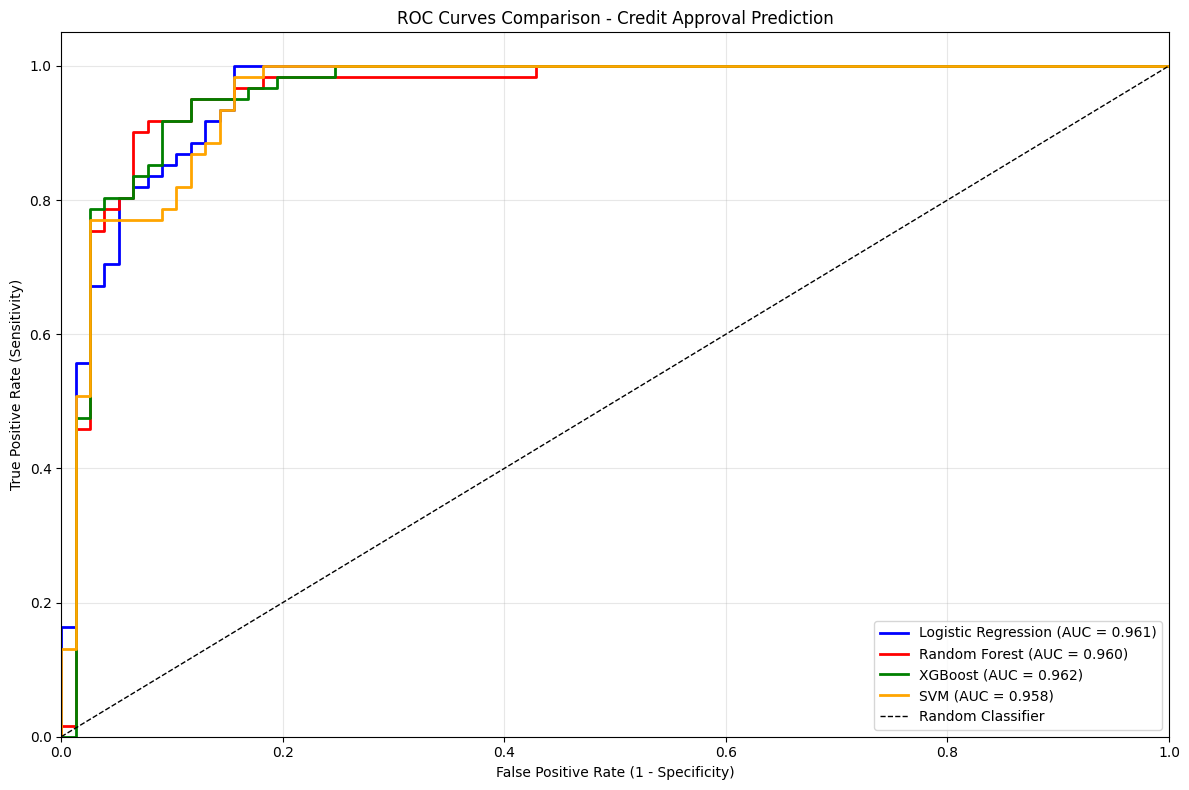

<Figure size 1200x800 with 0 Axes>

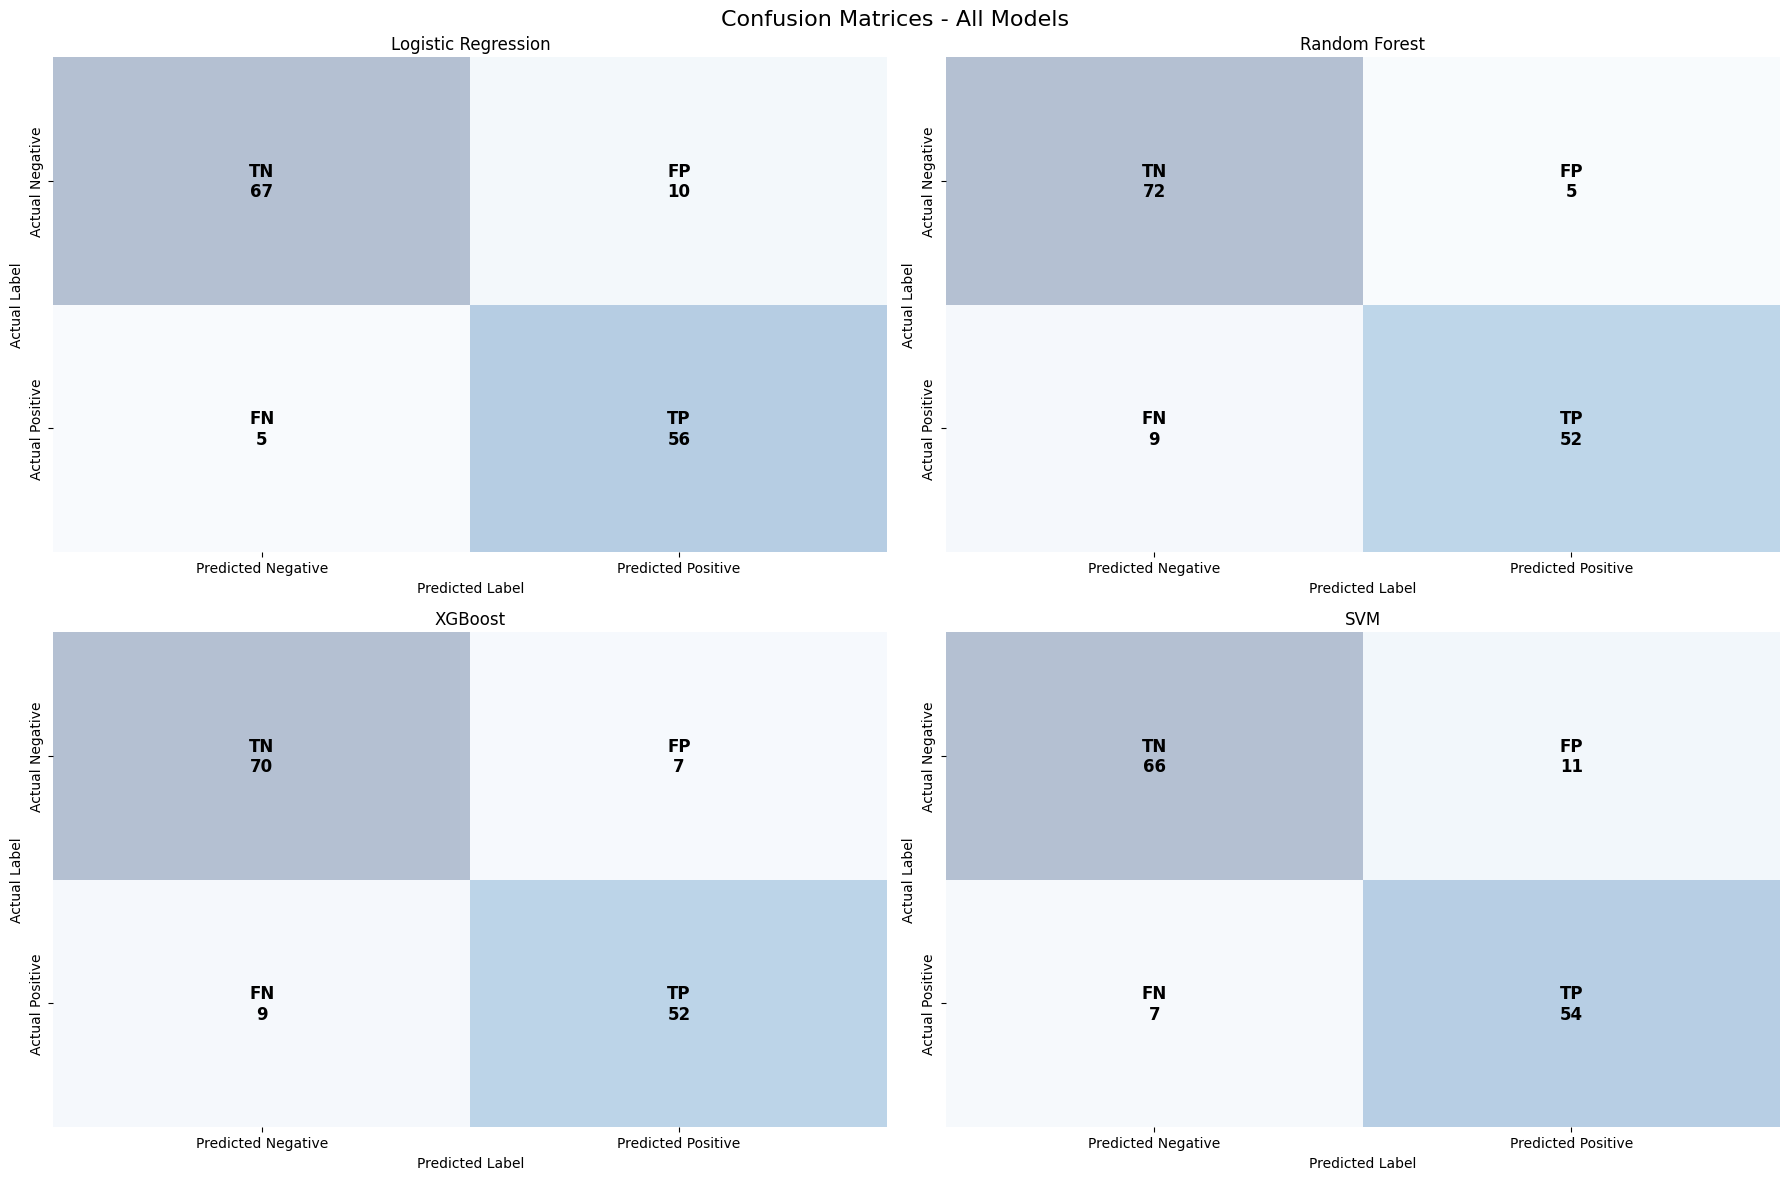

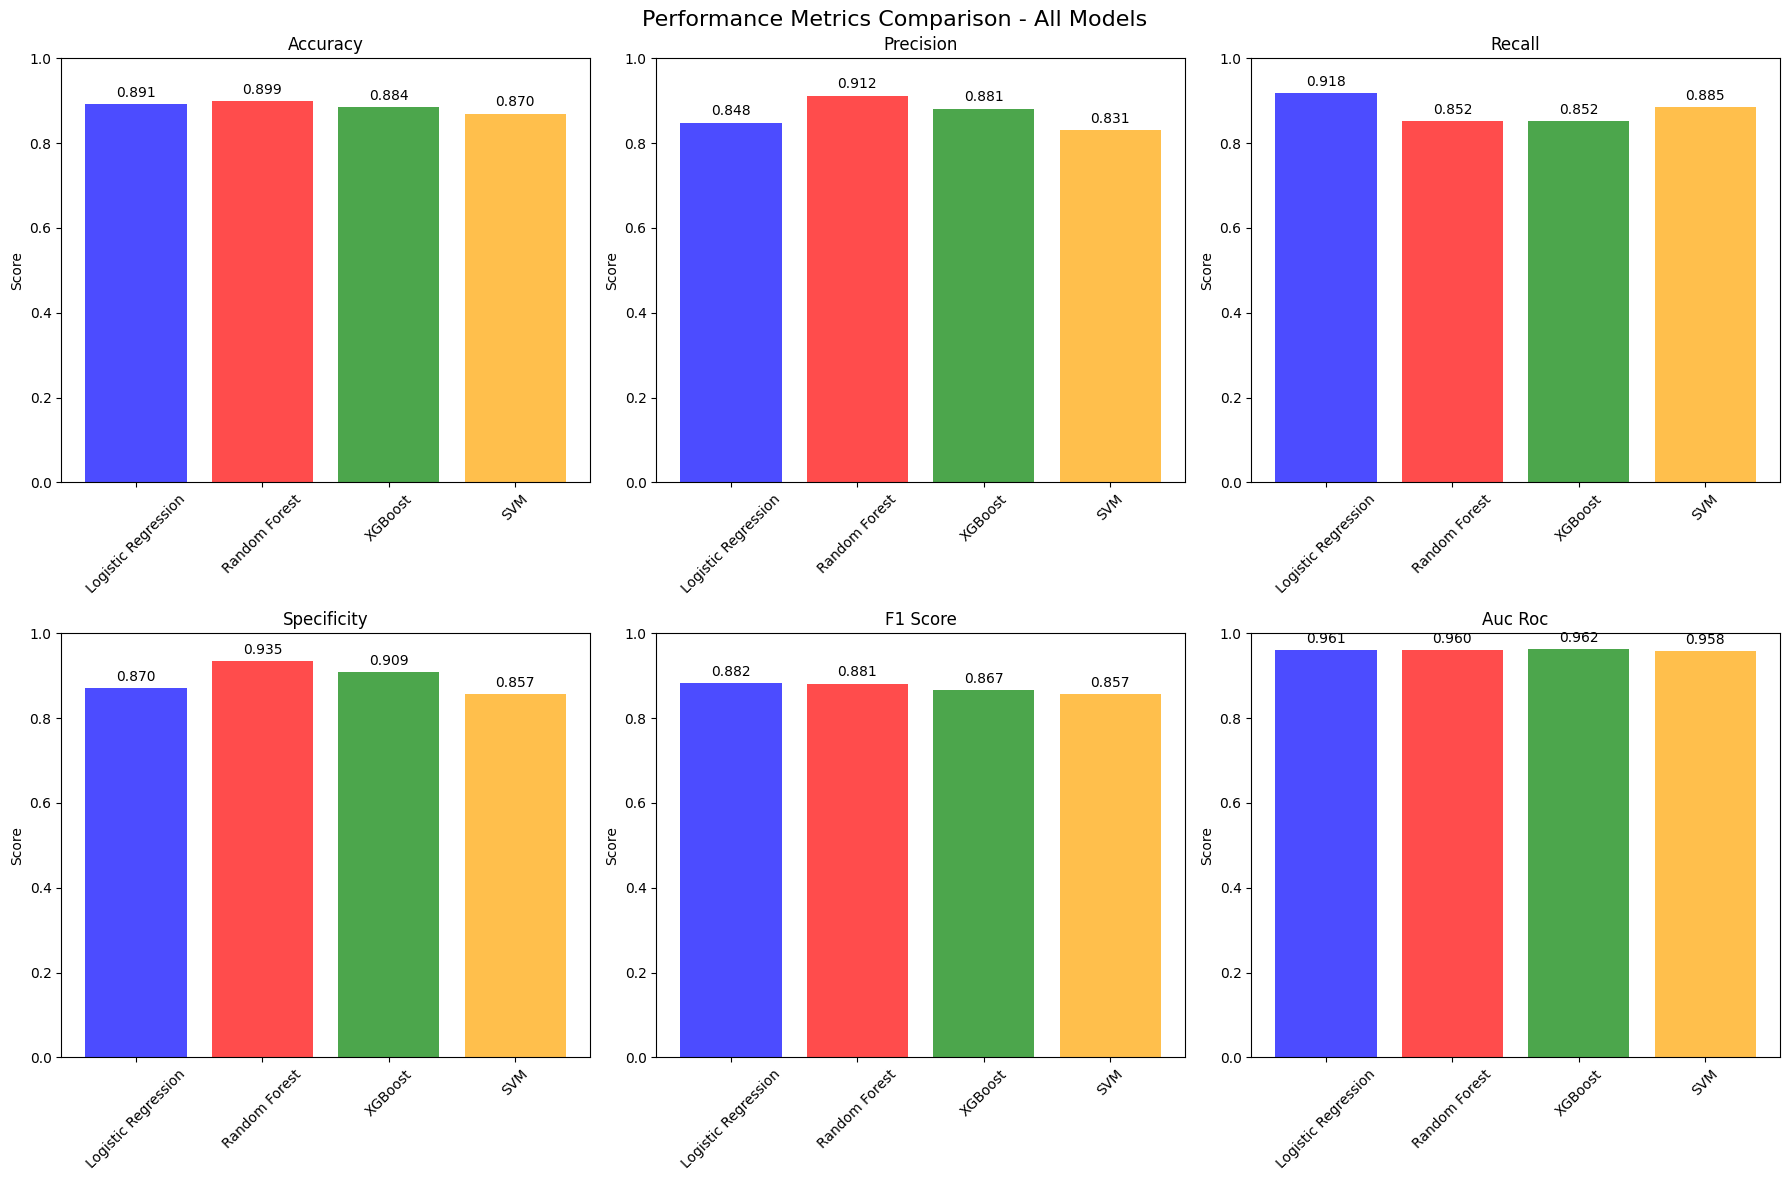


AUC_ROC Ranking:
  1. XGBoost           : 0.9619
  2. Logistic Regression: 0.9613
  3. Random Forest     : 0.9604
  4. SVM               : 0.9578

F1_SCORE Ranking:
  1. Logistic Regression: 0.8819
  2. Random Forest     : 0.8814
  3. XGBoost           : 0.8667
  4. SVM               : 0.8571

ACCURACY Ranking:
  1. Random Forest     : 0.8986
  2. Logistic Regression: 0.8913
  3. XGBoost           : 0.8841
  4. SVM               : 0.8696

PRECISION Ranking:
  1. Random Forest     : 0.9123
  2. XGBoost           : 0.8814
  3. Logistic Regression: 0.8485
  4. SVM               : 0.8308

RECALL Ranking:
  1. Logistic Regression: 0.9180
  2. SVM               : 0.8852
  3. Random Forest     : 0.8525
  4. XGBoost           : 0.8525


In [41]:
## Model Evaluation and Comparison

final_results = {}
model_predictions = {}

# Prepare data for visualizations
roc_curves = {}
pr_curves = {}
confusion_matrices = {}

for model_name, results in optimized_results.items():
    model = results['model']
    
    if models_baseline[model_name]['use_scaled']:
        X_test_model = datasets['scaled']['X_test']
    else:
        X_test_model = datasets['unscaled']['X_test']
    
    # Make predictions
    y_pred = model.predict(X_test_model)
    y_pred_proba = model.predict_proba(X_test_model)[:, 1]
    
    # Store predictions
    model_predictions[model_name] = {
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }
    
    # Calculate comprehensive metrics
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    # Store confusion matrix
    confusion_matrices[model_name] = confusion_matrix(y_test, y_pred)
    
    # Calculate detailed metrics
    sensitivity = tp / (tp + fn)  # Recall/True Positive Rate
    specificity = tn / (tn + fp)  # True Negative Rate
    precision = tp / (tp + fp)
    npv = tn / (tn + fn)  # Negative Predictive Value
    
    # ROC curve data
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_curves[model_name] = {'fpr': fpr, 'tpr': tpr}
    
    # Precision-Recall curve data
    precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_proba)
    pr_curves[model_name] = {'precision': precision_curve, 'recall': recall_curve}
    
    # Store comprehensive results
    final_results[model_name] = {
        'accuracy': results['accuracy'],
        'precision': precision,
        'recall': sensitivity,
        'specificity': specificity,
        'f1_score': results['f1_score'],
        'auc_roc': results['auc_roc'],
        'npv': npv,
        'true_positives': tp,
        'true_negatives': tn,
        'false_positives': fp,
        'false_negatives': fn,
    }

# Create final comparison DataFrame
final_comparison = pd.DataFrame(final_results).T
final_comparison = final_comparison.round(4)

display(final_comparison[['accuracy', 'precision', 'recall', 'specificity', 'f1_score', 'auc_roc']])


# ROC Curves Comparison
plt.figure(figsize=(12, 8))
colors = ['blue', 'red', 'green', 'orange', 'purple']

for i, (model_name, roc_data) in enumerate(roc_curves.items()):
    auc_score = final_results[model_name]['auc_roc']
    plt.plot(roc_data['fpr'], roc_data['tpr'], 
            color=colors[i], linewidth=2,
            label=f'{model_name} (AUC = {auc_score:.3f})')

plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curves Comparison - Credit Approval Prediction')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))



# Confusion Matrices
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes = axes.ravel()

for i, (model_name, cm) in enumerate(confusion_matrices.items()):
    if i < 4:  # limit to first 4 models
        sns.heatmap(cm, annot=False, fmt='d', cmap='Blues', ax=axes[i],
                    xticklabels=['Predicted Negative', 'Predicted Positive'],
                    yticklabels=['Actual Negative', 'Actual Positive'],
                    cbar=False, vmin=0, vmax=cm.max(), alpha=0.3)  # lighter background
        axes[i].set_title(f'{model_name}')
        axes[i].set_xlabel('Predicted Label')
        axes[i].set_ylabel('Actual Label')
        
        # Overlay TP, TN, FP, FN labels with strong contrast
        labels = [['TN', 'FP'],
                  ['FN', 'TP']]
        for y in range(2):
            for x in range(2):
                axes[i].text(x + 0.5, y + 0.5, f'{labels[y][x]}\n{cm[y, x]}', 
                             ha='center', va='center', fontsize=12, weight='bold', color='black')



plt.suptitle('Confusion Matrices - All Models', fontsize=16)
plt.tight_layout()
plt.show()

# Performance Metrics Comparison
metrics = ['accuracy', 'precision', 'recall', 'specificity', 'f1_score', 'auc_roc']
model_names = list(final_results.keys())

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, metric in enumerate(metrics):
    values = [final_results[model][metric] for model in model_names]
    bars = axes[i].bar(model_names, values, color=colors[:len(model_names)], alpha=0.7)
    axes[i].set_title(f'{metric.replace("_", " ").title()}')
    axes[i].set_ylabel('Score')
    axes[i].set_ylim(0, 1)
    axes[i].tick_params(axis='x', rotation=45)
    
    # Add value labels on bars
    for bar, value in zip(bars, values):
        axes[i].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                    f'{value:.3f}', ha='center', va='bottom')

plt.suptitle('Performance Metrics Comparison - All Models', fontsize=16)
plt.tight_layout()
plt.show()

ranking_metrics = ['auc_roc', 'f1_score', 'accuracy', 'precision', 'recall']
for metric in ranking_metrics:
    ranked_models = final_comparison.sort_values(metric, ascending=False)
    print(f"\n{metric.upper()} Ranking:")
    for i, (model, score) in enumerate(ranked_models[metric].items(), 1):
        print(f"  {i}. {model:18s}: {score:.4f}")



Random Forest - Top 15 Most Important Features:
Feature  Importance
     A9    0.254573
    A11    0.106062
     A8    0.091253
    A15    0.082376
     A3    0.076432
    A10    0.068760
     A2    0.058637
    A14    0.054203
   A7_h    0.012714
   A6_x    0.011922
  A7_ff    0.010780
    A12    0.010590
  A6_ff    0.010259
   A6_q    0.009547
  A6_cc    0.009402

XGBoost - Top 15 Most Important Features:
Feature  Importance
     A9    0.404074
    A10    0.076663
    A11    0.054300
  A13_p    0.033450
    A15    0.025844
     A3    0.019733
   A6_x    0.019455
   A6_k    0.019436
    A14    0.019271
   A7_h    0.018736
  A7_ff    0.018309
   A4_u    0.018271
  A6_cc    0.017673
  A6_ff    0.017341
  A6_aa    0.016447

Logistic Regression - Top 15 Most Influential Features:
Feature  Coefficient
     A9     1.328942
    A15     0.398560
    A11     0.371960
    A10     0.305522
  A6_ff    -0.282224
  A13_p     0.207780
   A6_x     0.187149
     A8     0.139201
  A6_cc     0.088919
 

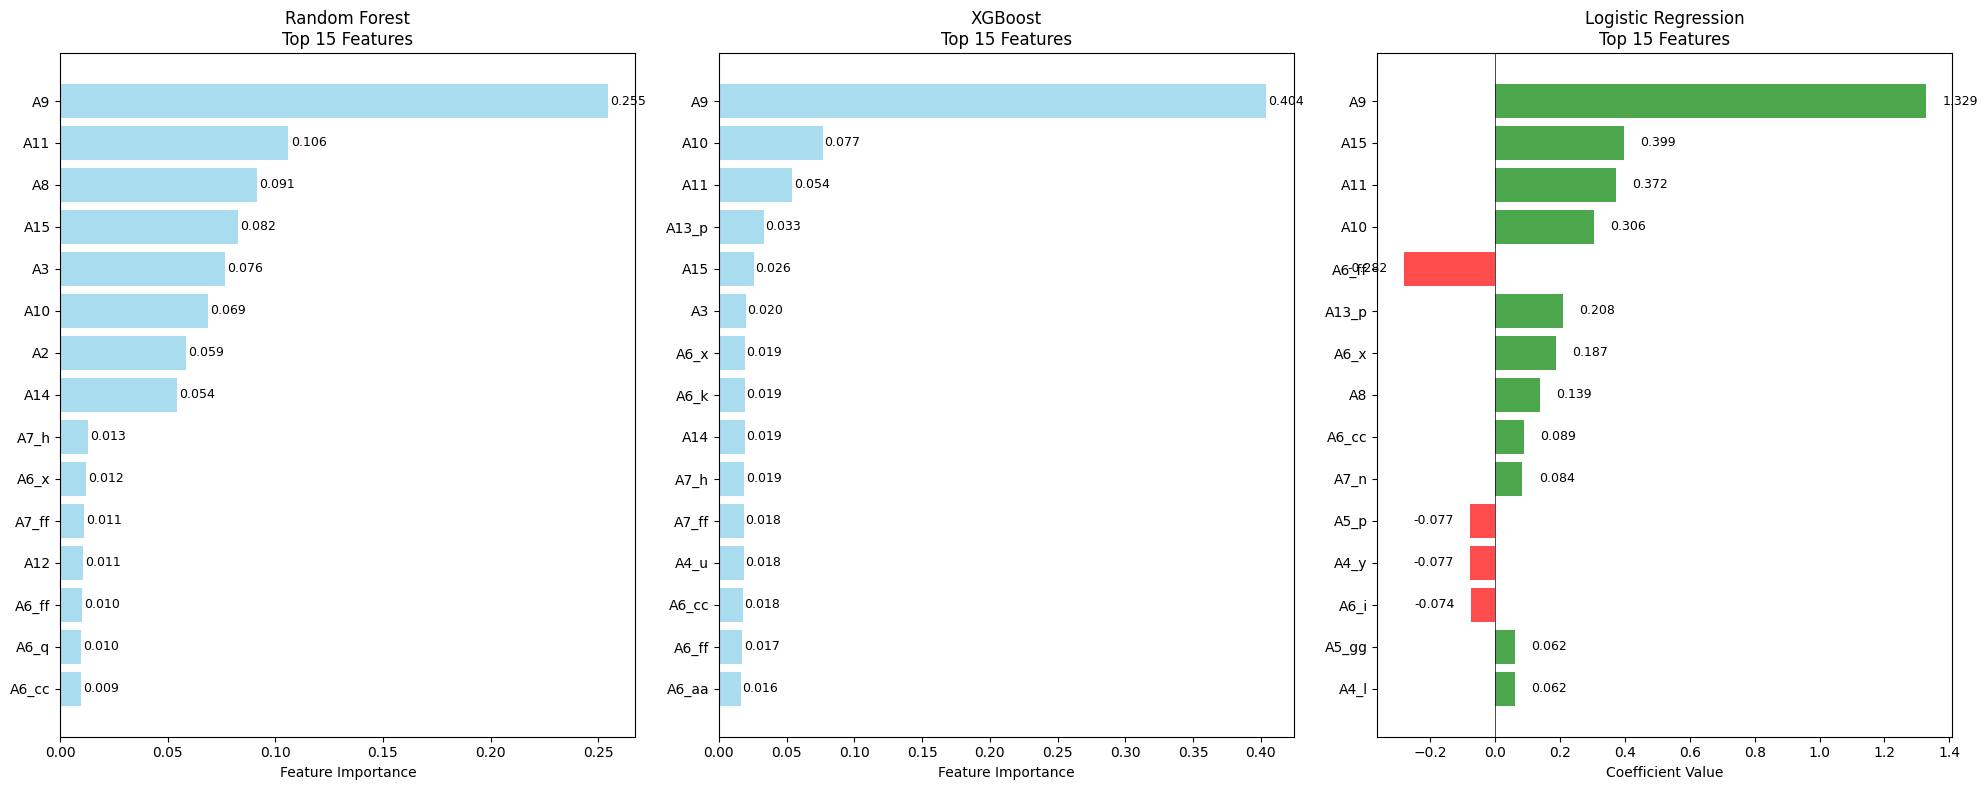

In [42]:
## Feature Importance Analysis and Model Interpretability

feature_importance_data = {}

tree_based_models = ['Random Forest', 'XGBoost']
linear_models = ['Logistic Regression']

feature_names = X_train.columns.tolist()
n_features_to_show = 15

for model_name in tree_based_models:
    if model_name in optimized_results:
        model = optimized_results[model_name]['model']
        importance_scores = model.feature_importances_
        
        # Create feature importance DataFrame
        feature_df = pd.DataFrame({
            'Feature': feature_names,
            'Importance': importance_scores
        }).sort_values('Importance', ascending=False)
        
        feature_importance_data[model_name] = feature_df
        
        print(f"\n{model_name} - Top {n_features_to_show} Most Important Features:")
        print(feature_df.head(n_features_to_show).to_string(index=False))


if 'Logistic Regression' in optimized_results:
    lr_model = optimized_results['Logistic Regression']['model']
    coefficients = lr_model.coef_[0]
    
    coef_df = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': coefficients,
        'Abs_Coefficient': np.abs(coefficients)
    }).sort_values('Abs_Coefficient', ascending=False)
    
    feature_importance_data['Logistic Regression'] = coef_df
    
    print(f"\nLogistic Regression - Top {n_features_to_show} Most Influential Features:")
    print(coef_df[['Feature', 'Coefficient']].head(n_features_to_show).to_string(index=False))



# Create subplots for feature importance
n_models_with_importance = len(feature_importance_data)
if n_models_with_importance > 0:
    fig, axes = plt.subplots(1, min(n_models_with_importance, 3), figsize=(20, 8))
    if n_models_with_importance == 1:
        axes = [axes]
    
    plot_idx = 0
    
    # Plot tree-based model importance
    for model_name in tree_based_models:
        if model_name in feature_importance_data and plot_idx < len(axes):
            importance_df = feature_importance_data[model_name].head(n_features_to_show)
            
            # Create horizontal bar plot
            y_pos = np.arange(len(importance_df))
            axes[plot_idx].barh(y_pos, importance_df['Importance'], color='skyblue', alpha=0.7)
            axes[plot_idx].set_yticks(y_pos)
            axes[plot_idx].set_yticklabels(importance_df['Feature'], fontsize=10)
            axes[plot_idx].set_xlabel('Feature Importance')
            axes[plot_idx].set_title(f'{model_name}\nTop {n_features_to_show} Features')
            axes[plot_idx].invert_yaxis()
            
            # Add value labels
            for i, v in enumerate(importance_df['Importance']):
                axes[plot_idx].text(v + 0.001, i, f'{v:.3f}', va='center', fontsize=9)
            
            plot_idx += 1
    
    # Plot logistic regression coefficients
    if 'Logistic Regression' in feature_importance_data and plot_idx < len(axes):
        coef_df = feature_importance_data['Logistic Regression'].head(n_features_to_show)
        
        colors = ['red' if x < 0 else 'green' for x in coef_df['Coefficient']]
        
        y_pos = np.arange(len(coef_df))
        axes[plot_idx].barh(y_pos, coef_df['Coefficient'], color=colors, alpha=0.7)
        axes[plot_idx].set_yticks(y_pos)
        axes[plot_idx].set_yticklabels(coef_df['Feature'], fontsize=10)
        axes[plot_idx].set_xlabel('Coefficient Value')
        axes[plot_idx].set_title(f'Logistic Regression\nTop {n_features_to_show} Features')
        axes[plot_idx].invert_yaxis()
        axes[plot_idx].axvline(x=0, color='black', linestyle='-', linewidth=0.5)
        
        # Add value labels
        for i, v in enumerate(coef_df['Coefficient']):
            axes[plot_idx].text(v + (0.05 if v >= 0 else -0.05), i, f'{v:.3f}', 
                               va='center', ha='left' if v >= 0 else 'right', fontsize=9)
    
    plt.tight_layout()
    plt.show()




# Saving Machine Learning Model and Artifacts

This script saves the trained ML model along with preprocessing components and metadata.


In [44]:
import pickle
import os

os.makedirs('models', exist_ok=True)

best_model = optimized_results['XGBoost']['model']
model_path = 'models/credit_approval_model.pkl'
with open(model_path, 'wb') as f:
    pickle.dump(best_model, f)
print(f" Best model (XGBoost) saved to: {model_path}")

# Save the scaler for preprocessing
scaler_path = 'models/scaler.pkl'
with open(scaler_path, 'wb') as f:
    pickle.dump(scaler, f)
print(f" Scaler saved to: {scaler_path}")

# Save feature names for proper preprocessing
feature_names = X_train.columns.tolist()
features_path = 'models/feature_names.pkl'
with open(features_path, 'wb') as f:
    pickle.dump(feature_names, f)
print(f" Feature names saved to: {features_path}")

# Save model metadata
model_metadata = {
    'model_type': 'XGBoost',
    'accuracy': optimized_results['XGBoost']['accuracy'],
    'auc_roc': optimized_results['XGBoost']['auc_roc'],
    'precision': optimized_results['XGBoost']['precision'],
    'recall': optimized_results['XGBoost']['recall'],
    'f1_score': optimized_results['XGBoost']['f1_score'],
    'feature_count': len(feature_names),
    'training_date': pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S'),
    'best_params': optimized_results['XGBoost']['best_params']
}

metadata_path = 'models/model_metadata.pkl'
with open(metadata_path, 'wb') as f:
    pickle.dump(model_metadata, f)
print(f" Model metadata saved to: {metadata_path}")


 Best model (XGBoost) saved to: models/credit_approval_model.pkl
 Scaler saved to: models/scaler.pkl
 Feature names saved to: models/feature_names.pkl
 Model metadata saved to: models/model_metadata.pkl


### Run the application
Execute this script to run the web application:

```bash
streamlit run credit_app.py

## Discussion and Conclusion  

### Key Learnings and Takeaways  
This project offered practical exposure to the **end-to-end machine learning workflow** and highlighted several important lessons:  

- Impact of preprocessing on performance: Handling missing values and standardizing continuous features (A2, A3, A8, A11, A14, A15) was critical. Algorithms like SVM and Logistic Regression benefited significantly from scaling, while robust handling of missing data (up to 1.88% in A14) improved model stability.  

- Feature engineering as a performance driver: One-hot encoding expanded the dataset from 15 original attributes to 44 engineered features, allowing categorical variables to be effectively represented. This step substantially improved model learning capacity.  

- Interpretability vs. performance trade-off:  
  - Random Forest achieved the highest baseline performance (92.75% accuracy, AUC-ROC 0.960).  
  - Logistic Regression, though less accurate (86.23% accuracy, AUC-ROC 0.953), remained valuable due to its simplicity and interpretability—an important consideration in credit approval where regulatory compliance and explainability matter.  

Overall, the workflow demonstrated that strong predictive models can be built while balancing interpretability, fairness, and efficiency.  

---

### What Didn’t Work as Expected  
Some aspects of the project yielded less-than-expected outcomes:  

- Minimal hyperparameter gains: Tuning provided negligible improvements. For example, Random Forest’s AUC improved only from 0.960 → 0.9604, suggesting either the default parameters were already well-suited or the dataset’s modest size (690 instances) limited optimization impact.  

- Class imbalance challenges: Despite being relatively balanced (55.51% denials vs. 44.49% approvals), models exhibited different precision-recall trade-offs:  
  - SVM favored recall (88.52%) at the cost of precision (83.08%).  
  - Random Forest provided more balanced precision and recall.  
  These differences highlight the importance of aligning the model choice with the business priority—whether to minimize false approvals (FN) or false denials (FP).  

- **Feature anonymization limits insight**: With attributes A1–A15 anonymized, it was impossible to interpret feature importance in a domain-specific way, restricting deeper business validation.  

---

### Suggestions for Future Work  
Several directions could further improve performance and robustness:  

1. **Ensemble learning**  
   - Combine models using techniques like voting classifiers or stacking.  
   - Example: Random Forest (robust feature handling) + XGBoost (boosting power) + Logistic Regression (calibration) may yield stronger, more balanced performance.  

2. **Enhanced evaluation**  
   - Use stratified k-fold cross-validation with multiple seeds** to obtain more stable estimates.  
   - Incorporate uncertainty quantification for better real-world reliability.  

---

### Final Reflection  
This project demonstrated how machine learning success depends on more than just picking the best algorithm. Effective preprocessing, thoughtful model selection, and careful evaluation all played equally critical roles. While Random Forest and XGBoost offered the strongest predictive results, Logistic Regression’s interpretability highlighted the trade-offs central to applied ML in high-stakes contexts.  

Ultimately, the experience reinforced that building effective models requires balancing:  
- Predictive performance 
- Interpretability
- Computational efficiency
- Business alignment
